# **Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm
from itertools import combinations

sns.set(rc={'figure.figsize':(20,14)})


In [ ]:
# !pip3 uninstall statsmodels
# !pip3 install numpy scipy patsy pandas
# !pip3 install statsmodels

In [ ]:
# from statsmodels.tsa.ardl import ardl_select_order
# from statsmodels.tsa.api import ARDL
# from statsmodels.tsa.api import UECM

# **Import dataset**

In [ ]:
!gdown 1sDfoKFEAfvptZCi9nekPI7TL0prRORr2

Downloading...
From: https://drive.google.com/uc?id=1sDfoKFEAfvptZCi9nekPI7TL0prRORr2
To: /content/Dichvucongcong.csv
100% 9.49M/9.49M [00:00<00:00, 31.1MB/s]


In [ ]:
data = pd.read_csv("Dichvucongcong.csv")
data.head()

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
0,22,VPD,2021-12-01,15:12:03,HOSE,STOCK,17.90,19.15,16.65,17.80,...,17.600,34200.0,6.018000e+08,0.0,0.0,-0.30,-0.3000,-1.6760,2021-12-01,Dịch vụ công cộng
1,126,BWE,2021-12-03,15:12:06,HOSE,STOCK,47.00,50.20,43.75,46.70,...,45.083,240000.0,1.111869e+10,0.0,0.0,-1.50,-1.4596,-3.1915,2021-12-03,Dịch vụ công cộng
2,140,BWE,2021-12-01,15:12:03,HOSE,STOCK,47.00,50.20,43.75,46.95,...,45.200,251400.0,1.167699e+10,0.0,0.0,0.00,0.0000,0.0000,2021-12-01,Dịch vụ công cộng
3,178,QPH,2021-12-07,15:12:01,UPCOM,STOCK,32.30,37.10,27.50,32.80,...,31.000,5300.0,1.748100e+08,0.0,0.0,0.80,0.7519,2.4768,2021-12-07,Dịch vụ công cộng
4,202,PMG,2021-12-03,15:12:06,HOSE,STOCK,16.85,18.00,15.70,16.90,...,17.370,5200.0,9.033000e+07,0.0,0.0,0.75,0.7500,4.4510,2021-12-03,Dịch vụ công cộng


In [ ]:
for col in data.columns:
    print(col)

Unnamed: 0
code
date
time
floor
type
basicPrice
ceilingPrice
floorPrice
open
high
low
close
average
adOpen
adHigh
adLow
adClose
adAverage
nmVolume
nmValue
ptVolume
ptValue
change
adChange
pctChange
snapshot_date
vietnameseName


In [ ]:
data[['snapshot_date','date']]

,snapshot_date,date
0,2021-12-01,2021-12-01
1,2021-12-03,2021-12-03
2,2021-12-01,2021-12-01
3,2021-12-07,2021-12-07
4,2021-12-03,2021-12-03
...,...,...
52928,2017-11-22,2017-11-22
52929,2017-12-20,2017-12-20
52930,2017-12-25,2017-12-25
52931,2017-03-06,2017-03-06


In [ ]:
data['date'].equals(data['snapshot_date'])

True

In [ ]:
data['floor'].unique()

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

# **DATA PREPARATION**

## **SELECTING STOCKS FOR ANALYSIS**

### **Analysis of each floor**

In [ ]:
prep_data = data[['code', 'date', 'time','floor','type']]

In [ ]:
prep_data

,code,date,time,floor,type
0,VPD,2021-12-01,15:12:03,HOSE,STOCK
1,BWE,2021-12-03,15:12:06,HOSE,STOCK
2,BWE,2021-12-01,15:12:03,HOSE,STOCK
3,QPH,2021-12-07,15:12:01,UPCOM,STOCK
4,PMG,2021-12-03,15:12:06,HOSE,STOCK
...,...,...,...,...,...
52928,HFC,2017-11-22,15:11:01,UPCOM,STOCK
52929,HFC,2017-12-20,15:12:01,UPCOM,STOCK
52930,HFC,2017-12-25,15:12:01,UPCOM,STOCK
52931,ASP,2017-03-06,15:03:01,HOSE,STOCK


#### **HOSE**

In [ ]:
prep_data_HOSE = prep_data.loc[prep_data['floor'] == 'HOSE']
prep_data_HOSE

,code,date,time,floor,type
0,VPD,2021-12-01,15:12:03,HOSE,STOCK
1,BWE,2021-12-03,15:12:06,HOSE,STOCK
2,BWE,2021-12-01,15:12:03,HOSE,STOCK
4,PMG,2021-12-03,15:12:06,HOSE,STOCK
12,POW,2021-12-01,15:12:03,HOSE,STOCK
...,...,...,...,...,...
52860,ASP,2017-12-22,15:12:02,HOSE,STOCK
52877,GSP,2017-08-23,15:08:01,HOSE,STOCK
52913,ASP,2017-12-29,15:12:01,HOSE,STOCK
52931,ASP,2017-03-06,15:03:01,HOSE,STOCK


In [ ]:
prep_data_HOSE.nunique()

code        9
date     1247
time       72
floor       1
type        1
dtype: int64

In [ ]:
prep_data_HOSE.sort_values(by =['code','date','time'], inplace=True)
prep_data_HOSE

,code,date,time,floor,type
45239,ASP,2017-01-03,15:01:01,HOSE,STOCK
44321,ASP,2017-01-04,15:01:01,HOSE,STOCK
45115,ASP,2017-01-05,15:01:01,HOSE,STOCK
44454,ASP,2017-01-06,15:01:02,HOSE,STOCK
44455,ASP,2017-01-09,15:01:01,HOSE,STOCK
...,...,...,...,...,...
3072,VPD,2021-12-27,15:12:02,HOSE,STOCK
3370,VPD,2021-12-28,15:12:02,HOSE,STOCK
5705,VPD,2021-12-29,15:12:02,HOSE,STOCK
196,VPD,2021-12-30,15:12:03,HOSE,STOCK


In [ ]:
prep_data_HOSE['code'].unique()

array(['ASP', 'BWE', 'GSP', 'PMG', 'POW', 'SJD', 'TDM', 'TTE', 'VPD'],
      dtype=object)

In [ ]:
for code in list(prep_data_HOSE['code'].unique()):
    print(any(prep_data_HOSE[prep_data_HOSE['code'] == code]['date'].duplicated()))

False
False
False
False
False
False
False
False
False


In [ ]:
# Create a new dataframe by grouping the original dataframe by 'code' column
grouped_df = prep_data_HOSE.groupby('code')

# Create the new dataframe with 4 columns
HOSE_data_overview = pd.DataFrame({'stock_code': grouped_df['code'].unique(),
                                   'start_date': grouped_df['date'].first(),
                                   'end_date': grouped_df['date'].last(),
                                   'num_observation': grouped_df['code'].count()})

# Reset the index
HOSE_data_overview.reset_index(drop=True, inplace=True)


In [ ]:
HOSE_data_overview

,stock_code,start_date,end_date,num_observation
0,[ASP],2017-01-03,2021-12-31,1247
1,[BWE],2017-07-20,2021-12-31,1114
2,[GSP],2017-01-03,2021-12-31,1247
3,[PMG],2018-01-25,2021-12-31,984
4,[POW],2019-01-14,2021-12-31,744
5,[SJD],2017-01-03,2021-12-31,1247
6,[TDM],2018-10-24,2021-12-31,800
7,[TTE],2018-12-10,2021-12-31,767
8,[VPD],2018-01-22,2021-12-31,985


#### **UPCOM**

In [ ]:
prep_data_UPCOM = prep_data.loc[prep_data['floor'] == 'UPCOM']
prep_data_UPCOM

,code,date,time,floor,type
3,QPH,2021-12-07,15:12:01,UPCOM,STOCK
5,QPH,2021-12-01,15:12:01,UPCOM,STOCK
6,HNA,2021-12-01,15:12:01,UPCOM,STOCK
7,DVC,2021-12-01,15:12:01,UPCOM,STOCK
8,BWA,2021-12-01,15:12:01,UPCOM,STOCK
...,...,...,...,...,...
52926,HFC,2017-10-30,15:10:01,UPCOM,STOCK
52927,HFC,2017-11-08,15:11:01,UPCOM,STOCK
52928,HFC,2017-11-22,15:11:01,UPCOM,STOCK
52929,HFC,2017-12-20,15:12:01,UPCOM,STOCK


In [ ]:
prep_data_UPCOM.nunique()

code       44
date     1252
time       49
floor       1
type        1
dtype: int64

In [ ]:
prep_data_UPCOM.sort_values(by =['code','date','time'], inplace=True)
prep_data_UPCOM

,code,date,time,floor,type
41612,ABR,2018-06-12,15:06:01,UPCOM,STOCK
40476,ABR,2018-06-13,15:06:01,UPCOM,STOCK
42297,ABR,2018-06-14,15:06:01,UPCOM,STOCK
40410,ABR,2018-06-15,15:06:02,UPCOM,STOCK
41177,ABR,2018-06-18,15:06:01,UPCOM,STOCK
...,...,...,...,...,...
34436,WTN,2020-08-27,15:08:01,UPCOM,STOCK
7164,WTN,2020-08-28,15:08:01,UPCOM,STOCK
6952,WTN,2020-08-31,15:08:02,UPCOM,STOCK
6228,WTN,2020-09-01,15:09:01,UPCOM,STOCK


In [ ]:
prep_data_UPCOM['code'].unique()

array(['ABR', 'AVC', 'BPW', 'BWA', 'CHS', 'CMW', 'DBW', 'DNA', 'DNN',
       'DTC', 'DTE', 'DVC', 'DWC', 'E12', 'GLW', 'HAW', 'HBW', 'HFC',
       'HLE', 'HNA', 'HTW', 'KHW', 'LAW', 'MTG', 'NAW', 'NCP', 'NDW',
       'NED', 'NS3', 'PBK', 'PDT', 'PEG', 'POW', 'QPH', 'SCH', 'SP2',
       'STW', 'SVH', 'TDM', 'TVW', 'VCP', 'VMG', 'VPD', 'WTN'],
      dtype=object)

In [ ]:
for code in list(prep_data_UPCOM['code'].unique()):
    print(any(prep_data_UPCOM[prep_data_UPCOM['code'] == code]['date'].duplicated()))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
# Create a new dataframe by grouping the original dataframe by 'code' column
grouped_df = prep_data_UPCOM.groupby('code')

# Create the new dataframe with 4 columns
UPCOM_data_overview = pd.DataFrame({'stock_code': grouped_df['code'].unique(),
                                   'start_date': grouped_df['date'].first(),
                                   'end_date': grouped_df['date'].last(),
                                   'num_observation': grouped_df['code'].count()})

# Reset the index
UPCOM_data_overview.reset_index(drop=True, inplace=True)


In [ ]:
UPCOM_data_overview

,stock_code,start_date,end_date,num_observation
0,[ABR],2018-06-12,2021-12-31,895
1,[AVC],2018-01-08,2021-12-31,998
2,[BPW],2017-12-20,2021-12-31,1010
3,[BWA],2017-01-03,2021-12-31,1252
4,[CHS],2017-01-12,2021-12-31,1245
5,[CMW],2017-04-10,2021-12-31,1189
6,[DBW],2017-01-09,2021-12-31,1248
7,[DNA],2017-10-19,2021-12-31,1054
8,[DNN],2017-07-17,2021-12-31,1121
9,[DTC],2017-01-03,2021-10-28,1206


In [ ]:
UPCOM_data_overview[UPCOM_data_overview['num_observation'] == 1252]

,stock_code,start_date,end_date,num_observation
3,[BWA],2017-01-03,2021-12-31,1252
11,[DVC],2017-01-03,2021-12-31,1252
17,[HFC],2017-01-03,2021-12-31,1252
20,[HTW],2017-01-03,2021-12-31,1252
22,[LAW],2017-01-03,2021-12-31,1252
23,[MTG],2017-01-03,2021-12-31,1252
28,[NS3],2017-01-03,2021-12-31,1252
33,[QPH],2017-01-03,2021-12-31,1252
35,[SP2],2017-01-03,2021-12-31,1252
40,[VCP],2017-01-03,2021-12-31,1252


#### **HNX**

In [ ]:
prep_data_HNX = prep_data.loc[prep_data['floor'] == 'HNX']
prep_data_HNX

,code,date,time,floor,type
13,THS,2021-12-01,15:12:04,HNX,STOCK
21,DTC,2021-12-03,15:12:08,HNX,STOCK
50,NBP,2021-12-09,15:12:03,HNX,STOCK
55,NBP,2021-12-15,15:12:04,HNX,STOCK
68,DTC,2021-12-13,15:12:03,HNX,STOCK
...,...,...,...,...,...
52915,NBP,2017-08-31,15:08:01,HNX,STOCK
52916,NBP,2017-09-22,15:09:06,HNX,STOCK
52917,NBP,2017-09-27,15:09:01,HNX,STOCK
52918,NBP,2017-10-31,15:10:01,HNX,STOCK


In [ ]:
prep_data_HNX.nunique()

code        4
date     1252
time       79
floor       1
type        1
dtype: int64

In [ ]:
prep_data_HNX.sort_values(by =['code','date','time'], inplace=True)
prep_data_HNX

,code,date,time,floor,type
947,DTC,2021-11-16,15:11:02,HNX,STOCK
1011,DTC,2021-11-17,15:11:05,HNX,STOCK
600,DTC,2021-11-18,15:11:04,HNX,STOCK
881,DTC,2021-11-19,15:11:06,HNX,STOCK
3507,DTC,2021-11-22,15:11:05,HNX,STOCK
...,...,...,...,...,...
3181,THS,2021-12-27,15:12:02,HNX,STOCK
5581,THS,2021-12-28,15:12:03,HNX,STOCK
3270,THS,2021-12-29,15:12:03,HNX,STOCK
5525,THS,2021-12-30,15:12:03,HNX,STOCK


In [ ]:
prep_data_HNX['code'].unique()

array(['DTC', 'EBA', 'NBP', 'THS'], dtype=object)

In [ ]:
for code in list(prep_data_HNX['code'].unique()):
    print(any(prep_data_HNX[prep_data_HNX['code'] == code]['date'].duplicated()))

False
False
False
False


In [ ]:
# Create a new dataframe by grouping the original dataframe by 'code' column
grouped_df = prep_data_HNX.groupby('code')

# Create the new dataframe with 4 columns
HNX_data_overview = pd.DataFrame({'stock_code': grouped_df['code'].unique(),
                                   'start_date': grouped_df['date'].first(),
                                   'end_date': grouped_df['date'].last(),
                                   'num_observation': grouped_df['code'].count()})

# Reset the index
HNX_data_overview.reset_index(drop=True, inplace=True)


In [ ]:
HNX_data_overview

,stock_code,start_date,end_date,num_observation
0,[DTC],2021-11-16,2021-12-31,34
1,[EBA],2019-12-31,2021-08-31,417
2,[NBP],2017-01-03,2021-12-31,1252
3,[THS],2017-01-03,2021-12-31,1252


#### **New dataframe with stocks in focus**

Choose stocks from UPCOM that have the same number of observations, start date and end date. Notice that HNX, or HOSE does not have enough stocks which have the same number of observations, start date and end date as each others.

In [ ]:
temp_selected_data = data[['code', 'date','floor','type','close']]
UPCOM_data = temp_selected_data.loc[(data['code'] == 'BWA') | (data['code'] == 'DVC') |
         (data['code'] == 'HFC') | (data['code'] == 'MTG') |(data['code'] == 'QPH')]

In [ ]:
UPCOM_data.sort_values(by=['code','date'], inplace=True)
UPCOM_data

,code,date,floor,type,close
45220,BWA,2017-01-03,UPCOM,STOCK,5.5
45230,BWA,2017-01-04,UPCOM,STOCK,5.5
44539,BWA,2017-01-05,UPCOM,STOCK,5.5
44371,BWA,2017-01-06,UPCOM,STOCK,5.7
44329,BWA,2017-01-09,UPCOM,STOCK,5.7
...,...,...,...,...,...
3300,QPH,2021-12-27,UPCOM,STOCK,29.5
5580,QPH,2021-12-28,UPCOM,STOCK,29.5
5555,QPH,2021-12-29,UPCOM,STOCK,29.0
3018,QPH,2021-12-30,UPCOM,STOCK,29.0


## **EDA OF UPCOM DATA**

### **Data Info**

In [ ]:
UPCOM_data.reset_index(inplace=True, drop=True)

In [ ]:
UPCOM_data.head()

,code,date,floor,type,close
0,BWA,2017-01-03,UPCOM,STOCK,5.5
1,BWA,2017-01-04,UPCOM,STOCK,5.5
2,BWA,2017-01-05,UPCOM,STOCK,5.5
3,BWA,2017-01-06,UPCOM,STOCK,5.7
4,BWA,2017-01-09,UPCOM,STOCK,5.7


In [ ]:
UPCOM_data.tail()

,code,date,floor,type,close
6255,LAW,2021-12-27,UPCOM,STOCK,9.1
6256,LAW,2021-12-28,UPCOM,STOCK,9.1
6257,LAW,2021-12-29,UPCOM,STOCK,9.1
6258,LAW,2021-12-30,UPCOM,STOCK,9.1
6259,LAW,2021-12-31,UPCOM,STOCK,9.1


In [ ]:
UPCOM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260 entries, 0 to 6259
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6260 non-null   object 
 1   date    6260 non-null   object 
 2   floor   6260 non-null   object 
 3   type    6260 non-null   object 
 4   close   6260 non-null   float64
dtypes: float64(1), object(4)
memory usage: 244.7+ KB


In [ ]:
for col in UPCOM_data.columns:
  print(f'Number of unique values of column {col}: {UPCOM_data[col].nunique()}')

Number of unique values of column code: 5
Number of unique values of column date: 1252
Number of unique values of column floor: 1
Number of unique values of column type: 1
Number of unique values of column close: 160


In [ ]:
for col in UPCOM_data.columns:
  print(f'Unique values of column {col}: {UPCOM_data[col].unique()}')

Unique values of column code: ['BWA' 'DVC' 'HFC' 'HTW' 'LAW']
Unique values of column date: ['2017-01-03' '2017-01-04' '2017-01-05' ... '2021-12-29' '2021-12-30'
 '2021-12-31']
Unique values of column floor: ['UPCOM']
Unique values of column type: ['STOCK']
Unique values of column close: [ 5.5  5.7  6.5  7.4  6.4  5.   4.4  8.4  7.6  8.5  9.6  9.2  5.6  4.9
  4.3  4.8  5.4  6.1  6.9  7.8  8.8 10.  11.  12.6 14.4 16.5 16.1 18.5
 21.2 24.3 14.6 12.5 10.7  9.1  9.3  8.   7.2  8.1  7.9  5.9  6.7  5.8
  6.6  4.5  5.1  5.3  6.   7.   7.5  8.6  7.1 10.5 10.1  9.5 10.9  8.2
  5.2  4.7  9.7  9.   6.3  7.3  8.3 10.8  8.9  9.8 12.  13.  14.  11.9
 11.1 11.5 11.2  9.9 11.4 10.2 10.4 10.3 11.7 10.6 11.8 13.4 13.1 14.9
 15.  13.5 12.4 12.1 12.2  9.4 12.8 14.2  7.7  6.8  6.2  4.6  4.  15.4
 11.6 11.3  8.7 17.1 15.3 13.2 12.7 13.9 12.9 13.3 13.6 13.7 13.8 14.8
 17.  19.5 22.4 25.7 25.6 29.4 25.  25.4 25.3 25.2 21.5 18.3 15.6 16.3
 16.  18.4 15.7 15.9 14.5 14.3 15.5 15.1 17.8 20.4 23.4 26.9 30.9 35.5
 

In [ ]:
for code in list(UPCOM_data['code'].unique()):
    print(f"Duplicates in the 'date' column for stock code '{code}': {any(UPCOM_data[UPCOM_data['code'] == code]['date'].duplicated())}")

Duplicates in the 'date' column for stock code 'BWA': False
Duplicates in the 'date' column for stock code 'DVC': False
Duplicates in the 'date' column for stock code 'HFC': False
Duplicates in the 'date' column for stock code 'HTW': False
Duplicates in the 'date' column for stock code 'LAW': False


In [ ]:
for col_combi in itertools.combinations(UPCOM_data['code'].unique(), 2):
    time_index_identical = UPCOM_data[UPCOM_data['code'] == col_combi[0]]['date'].equals(UPCOM_data[UPCOM_data['code'] == col_combi[1]]['date'])
    print(f"Time index of stock '{col_combi[0]}' and '{col_combi[1]}' is identical: {time_index_identical}")

Time index of stock 'BWA' and 'DVC' is identical: False
Time index of stock 'BWA' and 'HFC' is identical: False
Time index of stock 'BWA' and 'HTW' is identical: False
Time index of stock 'BWA' and 'LAW' is identical: False
Time index of stock 'DVC' and 'HFC' is identical: False
Time index of stock 'DVC' and 'HTW' is identical: False
Time index of stock 'DVC' and 'LAW' is identical: False
Time index of stock 'HFC' and 'HTW' is identical: False
Time index of stock 'HFC' and 'LAW' is identical: False
Time index of stock 'HTW' and 'LAW' is identical: False


### **Create new time index**

#### **Generate new dataframe for each stock with new evenly spaced time index**

In [ ]:
def generate_new_df(df, code):
  # convert the date column to datetime type
  df['date'] = pd.to_datetime(df['date'])

  # create a date range for the full period
  start_date = '2017-01-03'
  end_date = '2021-12-31'
  full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

  # create a dataframe with the full date range and the other columns
  full_df = pd.DataFrame({'date': full_date_range})
  full_df['code'] = code
  full_df['floor'] = 'UPCOM'
  full_df['type'] = 'STOCK'
  full_df['close'] = float('NaN')

  # merge the full dataframe with the existing dataframe
  merged_df = pd.concat([df, full_df], sort=False)
  merged_df = merged_df.drop_duplicates(subset=['date'])
  merged_df = merged_df.sort_values(by='date')

  return merged_df


In [ ]:
UPCOM_data[UPCOM_data['code'] == 'MTG']

,code,date,floor,type,close


In [ ]:
df_BWA = generate_new_df(UPCOM_data[UPCOM_data['code'] == 'BWA'], 'BWA')
df_DVC = generate_new_df(UPCOM_data[UPCOM_data['code'] == 'DVC'], 'DVC')
df_HFC = generate_new_df(UPCOM_data[UPCOM_data['code'] == 'HFC'], 'HFC')
df_MTG = generate_new_df(UPCOM_data[UPCOM_data['code'] == 'MTG'], 'MTG')
df_QPH = generate_new_df(UPCOM_data[UPCOM_data['code'] == 'QPH'], 'QPH')

#### **Validate new dataframe of stock**

In [ ]:
df_BWA_org = UPCOM_data[UPCOM_data['code'] == 'BWA']

In [ ]:
df_BWA_org

,code,date,floor,type,close
0,BWA,2017-01-03,UPCOM,STOCK,5.5
1,BWA,2017-01-04,UPCOM,STOCK,5.5
2,BWA,2017-01-05,UPCOM,STOCK,5.5
3,BWA,2017-01-06,UPCOM,STOCK,5.7
4,BWA,2017-01-09,UPCOM,STOCK,5.7
...,...,...,...,...,...
1247,BWA,2021-12-27,UPCOM,STOCK,12.4
1248,BWA,2021-12-28,UPCOM,STOCK,12.4
1249,BWA,2021-12-29,UPCOM,STOCK,12.4
1250,BWA,2021-12-30,UPCOM,STOCK,12.1


In [ ]:
df_BWA_null = df_BWA[df_BWA['close'].isnull()]
df_BWA_null

,code,date,floor,type,close
4,BWA,2017-01-07,UPCOM,STOCK,NaN
5,BWA,2017-01-08,UPCOM,STOCK,NaN
11,BWA,2017-01-14,UPCOM,STOCK,NaN
12,BWA,2017-01-15,UPCOM,STOCK,NaN
18,BWA,2017-01-21,UPCOM,STOCK,NaN
...,...,...,...,...,...
1804,BWA,2021-12-12,UPCOM,STOCK,NaN
1810,BWA,2021-12-18,UPCOM,STOCK,NaN
1811,BWA,2021-12-19,UPCOM,STOCK,NaN
1817,BWA,2021-12-25,UPCOM,STOCK,NaN


In [ ]:
# Convert the data type of the date column in both dataframes
df_BWA_org['date'] = pd.to_datetime(df_BWA_org['date'])
df_BWA_null['date'] = pd.to_datetime(df_BWA_null['date'])

# Merge the two dataframes
merged_df = pd.merge(df_BWA_org, df_BWA_null, on=['code', 'date', 'floor', 'type'], how='inner')

# Get the dates that exist in both dataframes
common_dates = merged_df['date'].tolist()

print(common_dates)

[]


#### **Create new dataframe with evenly spaced time series for all stocks**

In [ ]:
combined_UPCOM_data = pd.DataFrame({'date': df_BWA['date'].reset_index(drop=True),
                                     'close_BWA': df_BWA['close'].reset_index(drop=True),
                                     'close_DVC': df_DVC['close'].reset_index(drop=True),
                                     'close_HFC': df_HFC['close'].reset_index(drop=True),
                                     'close_MTG': df_MTG['close'].reset_index(drop=True),
                                     'close_QPH': df_QPH['close'].reset_index(drop=True)})

combined_UPCOM_data

,date,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH
0,2017-01-03,5.5,8.3,13.1,3.2,13.5
1,2017-01-04,5.5,8.3,13.1,3.1,13.5
2,2017-01-05,5.5,8.3,13.1,3.2,13.5
3,2017-01-06,5.7,8.3,13.1,3.0,13.5
4,2017-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1819,2021-12-27,12.4,13.6,13.4,7.8,29.5
1820,2021-12-28,12.4,13.6,13.4,7.7,29.5
1821,2021-12-29,12.4,13.6,13.4,7.8,29.0
1822,2021-12-30,12.1,13.6,13.4,8.2,29.0


## **Fill Missing Data**

### **Missing Data Analysis**

In [ ]:
combined_UPCOM_data

,date,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH
0,2017-01-03,5.5,8.3,13.1,NaN,NaN
1,2017-01-04,5.5,8.3,13.1,NaN,NaN
2,2017-01-05,5.5,8.3,13.1,NaN,NaN
3,2017-01-06,5.7,8.3,13.1,NaN,NaN
4,2017-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1819,2021-12-27,12.4,13.6,13.4,NaN,NaN
1820,2021-12-28,12.4,13.6,13.4,NaN,NaN
1821,2021-12-29,12.4,13.6,13.4,NaN,NaN
1822,2021-12-30,12.1,13.6,13.4,NaN,NaN


In [ ]:
combined_UPCOM_data.set_index('date')

,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH
date,,,,,
2017-01-03,5.5,8.3,13.1,3.2,13.5
2017-01-04,5.5,8.3,13.1,3.1,13.5
2017-01-05,5.5,8.3,13.1,3.2,13.5
2017-01-06,5.7,8.3,13.1,3.0,13.5
2017-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-27,12.4,13.6,13.4,7.8,29.5
2021-12-28,12.4,13.6,13.4,7.7,29.5
2021-12-29,12.4,13.6,13.4,7.8,29.0


<Axes: >

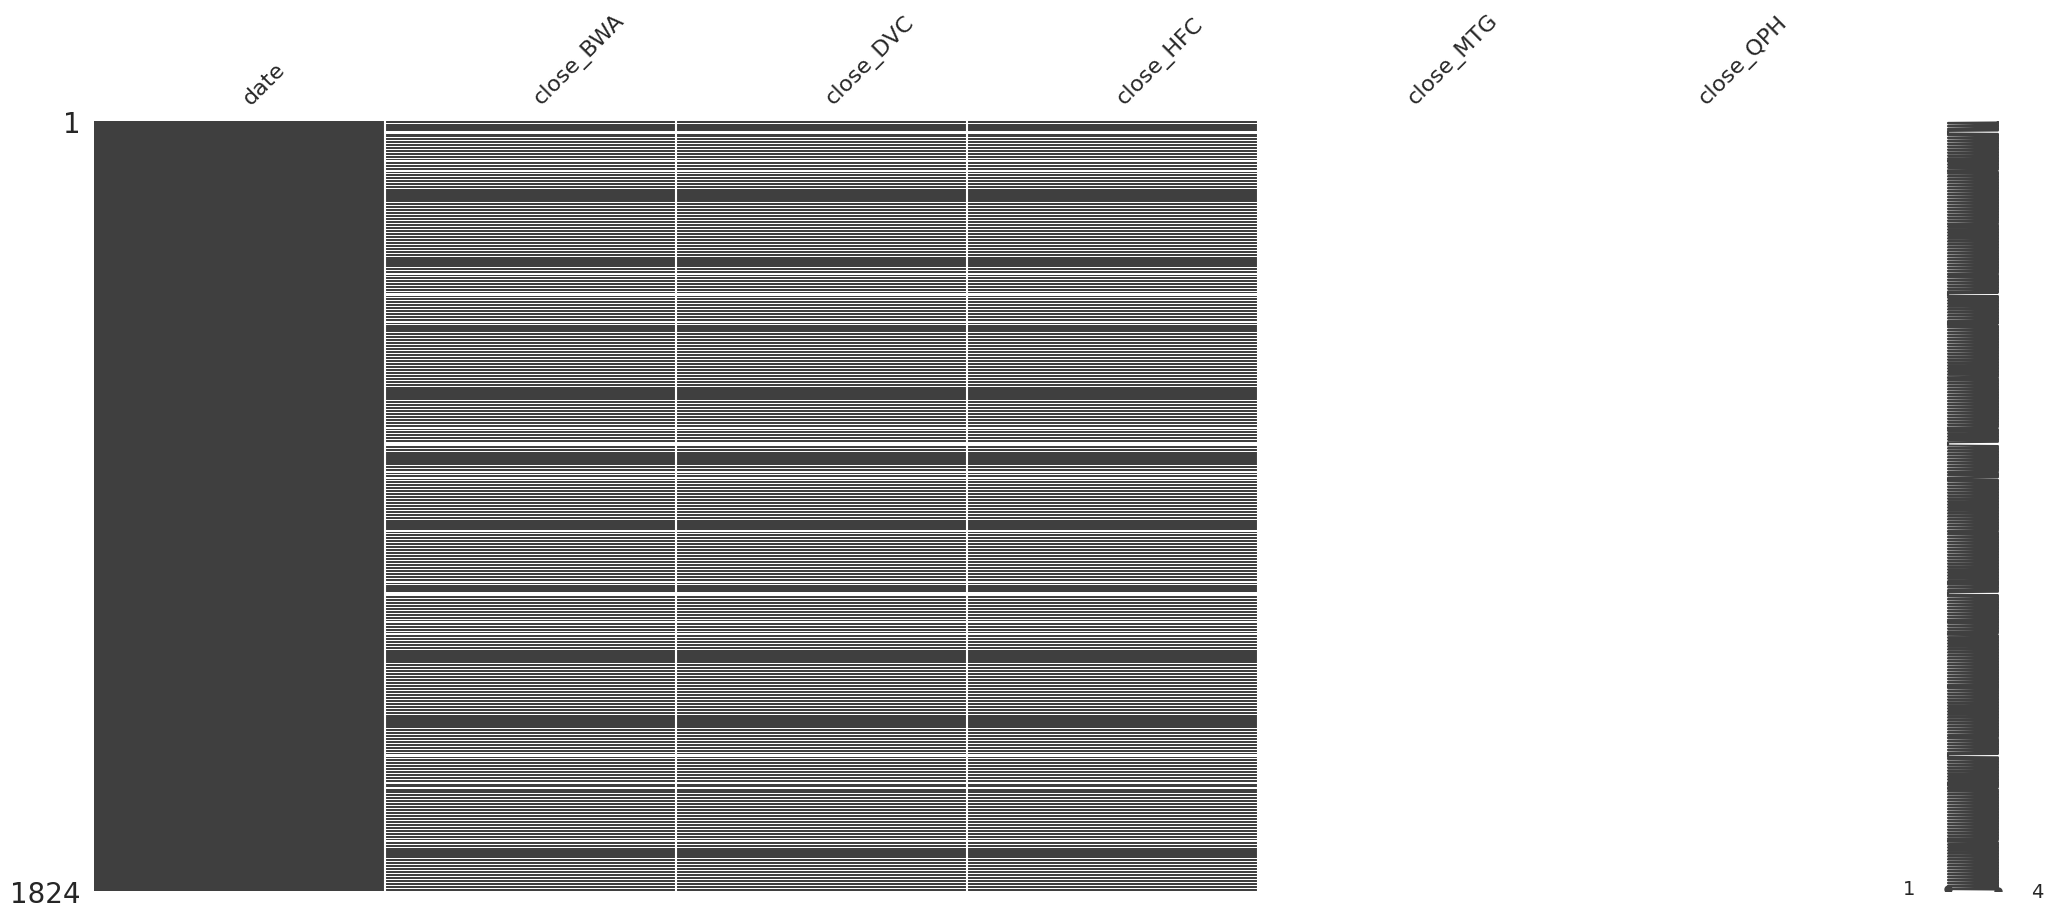

In [ ]:
msno.matrix(combined_UPCOM_data)

In [ ]:
temp = ((combined_UPCOM_data.isnull() | combined_UPCOM_data.isna()).sum() * 100 / (combined_UPCOM_data.index.size))
# temp is panda Series type

missing_percentage_df = pd.DataFrame({'stock':temp.index, 'percentage':temp.values})
# mapping Series type to Dataframe type

missing_percentage_df

,stock,percentage
0,date,0.000000
1,close_BWA,31.359649
2,close_DVC,31.359649
3,close_HFC,31.359649
4,close_MTG,31.359649
5,close_QPH,31.359649


In [ ]:
temp = ((combined_UPCOM_data.isnull() | combined_UPCOM_data.isna()).sum() * 100 / (combined_UPCOM_data.index.size))
# temp is panda Series type

missing_percentage_df = pd.DataFrame({'stock':temp.index, 'percentage':temp.values})
# mapping Series type to Dataframe type

missing_percentage_df

,stock,percentage
0,date,0.000000
1,close_BWA,31.359649
2,close_DVC,31.359649
3,close_HFC,31.359649
4,close_MTG,100.000000
5,close_QPH,100.000000


In [ ]:
fig = px.line(combined_UPCOM_data, x='date', y='close_BWA')
fig.show()

### **Filling missing Data**

In [ ]:
# Calculate the rolling mean with a window size of 5 days
rolling_mean = combined_UPCOM_data['close_BWA'].rolling(window=10, min_periods=1).mean()

# Fill the missing values with the rolling mean
filled_UPCOM_data =combined_UPCOM_data.copy()

filled_UPCOM_data['close_BWA'] = combined_UPCOM_data['close_BWA'].fillna(rolling_mean)
filled_UPCOM_data['close_DVC'] = combined_UPCOM_data['close_DVC'].fillna(rolling_mean)
filled_UPCOM_data['close_HFC'] = combined_UPCOM_data['close_HFC'].fillna(rolling_mean)
filled_UPCOM_data['close_MTG'] = combined_UPCOM_data['close_MTG'].fillna(rolling_mean)
filled_UPCOM_data['close_QPH'] = combined_UPCOM_data['close_QPH'].fillna(rolling_mean)


In [ ]:
filled_UPCOM_data

,date,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH
0,2017-01-03,5.50,8.30,13.10,3.20,13.50
1,2017-01-04,5.50,8.30,13.10,3.10,13.50
2,2017-01-05,5.50,8.30,13.10,3.20,13.50
3,2017-01-06,5.70,8.30,13.10,3.00,13.50
4,2017-01-07,5.55,5.55,5.55,5.55,5.55
...,...,...,...,...,...,...
1819,2021-12-27,12.40,13.60,13.40,7.80,29.50
1820,2021-12-28,12.40,13.60,13.40,7.70,29.50
1821,2021-12-29,12.40,13.60,13.40,7.80,29.00
1822,2021-12-30,12.10,13.60,13.40,8.20,29.00


<Axes: >

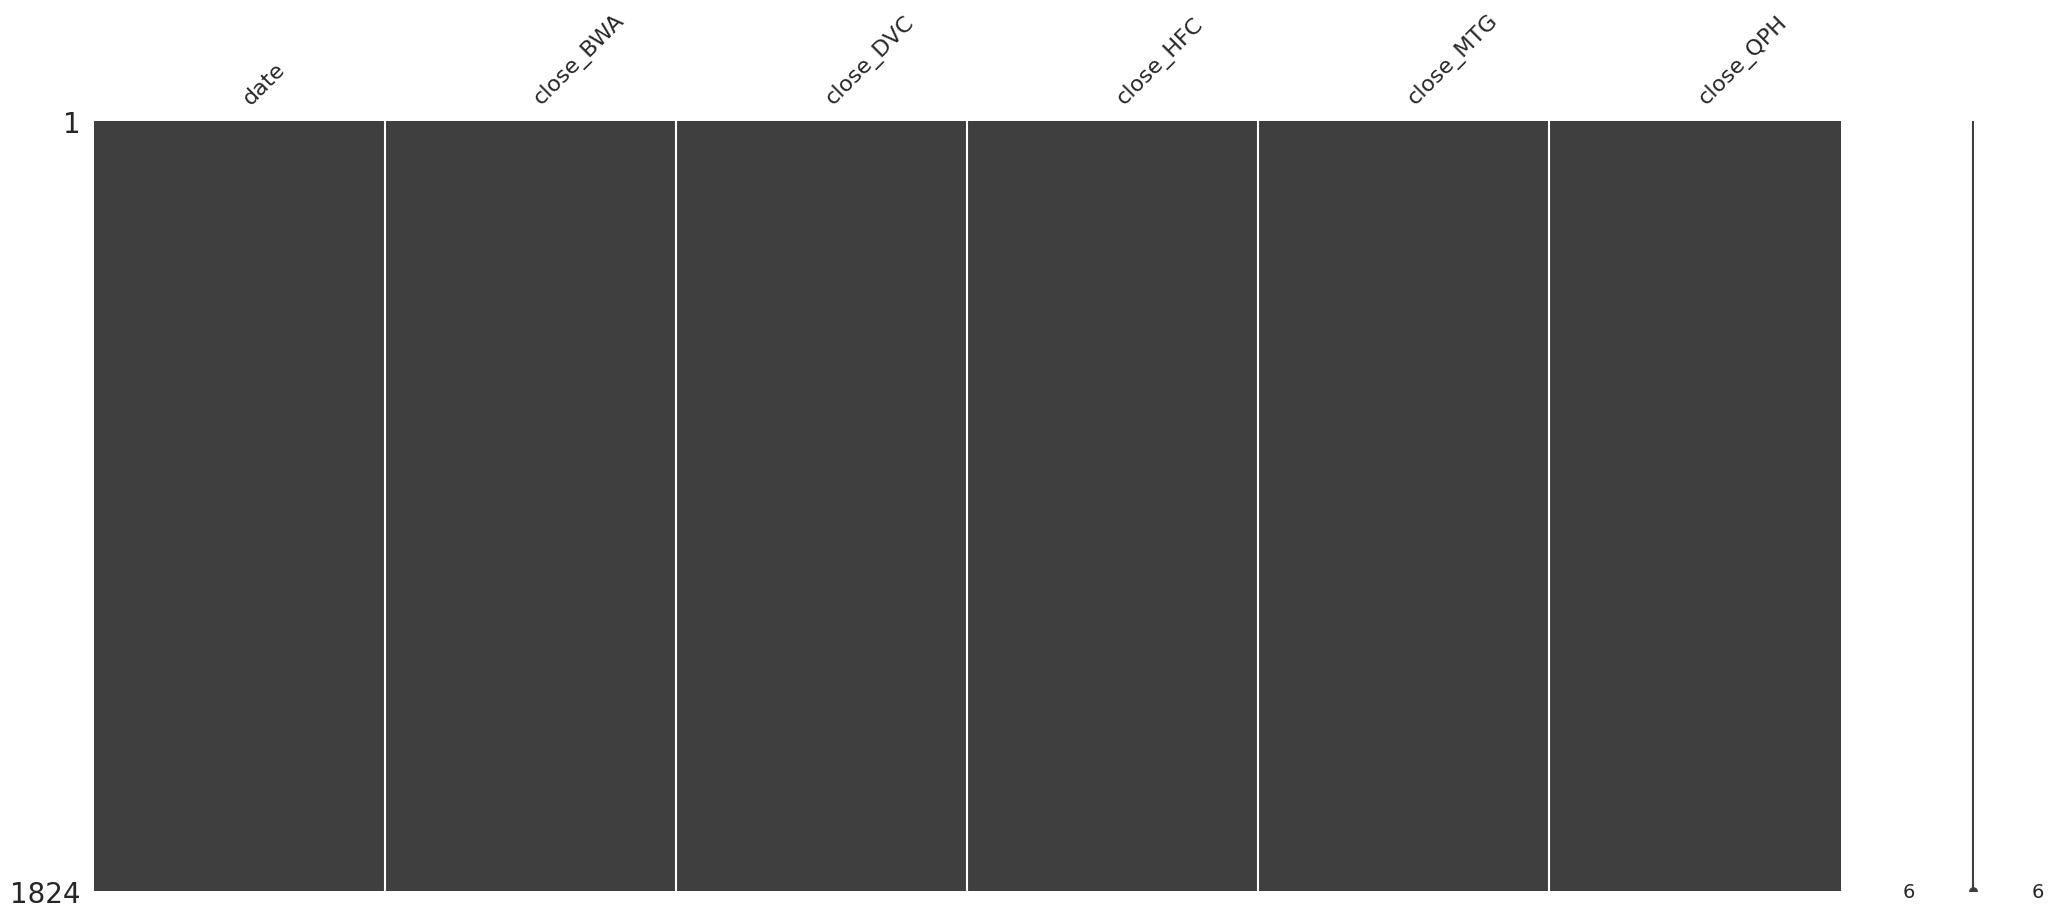

In [ ]:
msno.matrix(filled_UPCOM_data)

In [ ]:
filled_UPCOM_data

,date,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH
0,2017-01-03,5.50,8.30,13.10,5.500000,5.500000
1,2017-01-04,5.50,8.30,13.10,5.500000,5.500000
2,2017-01-05,5.50,8.30,13.10,5.500000,5.500000
3,2017-01-06,5.70,8.30,13.10,5.550000,5.550000
4,2017-01-07,5.55,5.55,5.55,5.550000,5.550000
...,...,...,...,...,...,...
1819,2021-12-27,12.40,13.60,13.40,11.966667,11.966667
1820,2021-12-28,12.40,13.60,13.40,12.028571,12.028571
1821,2021-12-29,12.40,13.60,13.40,12.075000,12.075000
1822,2021-12-30,12.10,13.60,13.40,11.900000,11.900000


In [ ]:
filled_UPCOM_data['year'] = filled_UPCOM_data['date'].dt.year
filled_UPCOM_data['month'] = filled_UPCOM_data['date'].dt.month
filled_UPCOM_data

,date,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH,year,month
0,2017-01-03,5.50,8.30,13.10,5.500000,5.500000,2017,1
1,2017-01-04,5.50,8.30,13.10,5.500000,5.500000,2017,1
2,2017-01-05,5.50,8.30,13.10,5.500000,5.500000,2017,1
3,2017-01-06,5.70,8.30,13.10,5.550000,5.550000,2017,1
4,2017-01-07,5.55,5.55,5.55,5.550000,5.550000,2017,1
...,...,...,...,...,...,...,...,...
1819,2021-12-27,12.40,13.60,13.40,11.966667,11.966667,2021,12
1820,2021-12-28,12.40,13.60,13.40,12.028571,12.028571,2021,12
1821,2021-12-29,12.40,13.60,13.40,12.075000,12.075000,2021,12
1822,2021-12-30,12.10,13.60,13.40,11.900000,11.900000,2021,12


In [ ]:
fig = px.line(filled_UPCOM_data, x='date', y='close_BWA')
fig.show()

In [ ]:
fig = px.line(filled_UPCOM_data, x='date', y='close_LAW')
fig.show()

ValueError: ignored

## **EDA**

In [ ]:
filled_UPCOM_data

### **BWA**

In [ ]:
filled_df_BWA = filled_UPCOM_data[['date','close_BWA']]
filled_df_BWA

In [ ]:
fig = px.line(filled_df_BWA, x="date", y="close_BWA", title=f'Close price of BWA',width=800, height=400)
fig.show()

In [ ]:
filled_df_BWA.info()

In [ ]:
filled_df_BWA.describe()

In [ ]:
from scipy.stats import kurtosis
kurtosis(filled_df_BWA['close_BWA'])

In [ ]:
from scipy.stats import skew
skew(filled_df_BWA['close_BWA'])

In [ ]:
print(f'Value range of close price BWE: [{filled_df_BWA["close_BWA"].min()}, {filled_df_BWA["close_BWA"].max()}]')

In [ ]:
sns.displot(filled_df_BWA['close_BWA'], kde=True, color='green')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=filled_df_BWA['close_BWA'], name="Close Price of BWA"))

fig.show()

In [ ]:
filled_df_BWA['date'] = pd.to_datetime(filled_df_BWA['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_BWA['close_BWA'], lag=1)
plt.show()

In [ ]:
filled_df_BWA['date'] = pd.to_datetime(filled_df_BWA['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_BWA['close_BWA'], lag=2)
plt.show()

### **DVC**

In [ ]:
filled_df_DVC = filled_UPCOM_data[['date','close_DVC']]
filled_df_DVC

In [ ]:
fig = px.line(filled_df_DVC, x="date", y="close_DVC", title=f'Close price of DVC',width=800, height=400)
fig.show()

In [ ]:
filled_df_DVC.info()

In [ ]:
filled_df_DVC.describe()

In [ ]:
from scipy.stats import kurtosis
kurtosis(filled_df_DVC['close_DVC'])

In [ ]:
from scipy.stats import skew
skew(filled_df_DVC['close_DVC'])

In [ ]:
print(f'Value range of close price DVC: [{filled_df_DVC["close_DVC"].min()}, {filled_df_DVC["close_DVC"].max()}]')

In [ ]:
sns.displot(filled_df_DVC['close_DVC'], kde=True, color='green')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=filled_df_DVC['close_DVC'], name="Close Price of DVC"))

fig.show()

In [ ]:
filled_df_DVC['date'] = pd.to_datetime(filled_df_DVC['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_DVC['close_DVC'], lag=1)
plt.show()

In [ ]:
filled_df_DVC['date'] = pd.to_datetime(filled_df_DVC['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_DVC['close_DVC'], lag=2)
plt.show()

### **HFC**

In [ ]:
filled_df_HFC = filled_UPCOM_data[['date','close_HFC']]
filled_df_HFC

In [ ]:
fig = px.line(filled_df_HFC, x="date", y="close_HFC", title=f'Close price of HFC',width=800, height=400)
fig.show()

In [ ]:
filled_df_HFC.info()

In [ ]:
filled_df_HFC.describe()

In [ ]:
from scipy.stats import kurtosis
kurtosis(filled_df_HFC['close_HFC'])

In [ ]:
from scipy.stats import skew
skew(filled_df_HFC['close_HFC'])

In [ ]:
print(f'Value range of close price HFC: [{filled_df_HFC["close_HFC"].min()}, {filled_df_HFC["close_HFC"].max()}]')

In [ ]:
sns.displot(filled_df_HFC['close_HFC'], kde=True, color='green')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=filled_df_HFC['close_HFC'], name="Close Price of HFC"))

fig.show()

In [ ]:
filled_df_HFC['date'] = pd.to_datetime(filled_df_HFC['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_HFC['close_HFC'], lag=1)
plt.show()

In [ ]:
filled_df_HFC['date'] = pd.to_datetime(filled_df_HFC['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_HFC['close_HFC'], lag=2)
plt.show()

### **HTW**

In [ ]:
filled_df_HTW = filled_UPCOM_data[['date','close_HTW']]
filled_df_HTW

In [ ]:
fig = px.line(filled_df_HTW, x="date", y="close_HTW", title=f'Close price of HTW',width=800, height=400)
fig.show()

In [ ]:
filled_df_HTW.info()

In [ ]:
filled_df_HTW.describe()

In [ ]:
from scipy.stats import kurtosis
kurtosis(filled_df_HTW['close_HTW'])

In [ ]:
from scipy.stats import skew
skew(filled_df_HTW['close_HTW'])

In [ ]:
print(f'Value range of close price HFC: [{filled_df_HTW["close_HTW"].min()}, {filled_df_HTW["close_HTW"].max()}]')

In [ ]:
sns.displot(filled_df_HTW['close_HTW'], kde=True, color='green')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=filled_df_HTW['close_HTW'], name="Close Price of HTW"))

fig.show()

In [ ]:
filled_df_HTW['date'] = pd.to_datetime(filled_df_HTW['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_HTW['close_HTW'], lag=1)
plt.show()

In [ ]:
filled_df_HFC['date'] = pd.to_datetime(filled_df_HFC['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_HFC['close_HFC'], lag=2)
plt.show()

### **LAW**

In [ ]:
filled_df_LAW = filled_UPCOM_data[['date','close_LAW']]
filled_df_LAW

In [ ]:
fig = px.line(filled_df_LAW, x="date", y="close_LAW", title=f'Close price of LAW',width=800, height=400)
fig.show()

In [ ]:
filled_df_LAW.info()

In [ ]:
filled_df_LAW.describe()

In [ ]:
from scipy.stats import kurtosis
kurtosis(filled_df_LAW['close_LAW'])

In [ ]:
from scipy.stats import skew
skew(filled_df_LAW['close_LAW'])

In [ ]:
print(f'Value range of close price HFC: [{filled_df_LAW["close_LAW"].min()}, {filled_df_LAW["close_LAW"].max()}]')

In [ ]:
sns.displot(filled_df_LAW['close_LAW'], kde=True, color='green')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=filled_df_LAW['close_LAW'], name="Close Price of LAW"))

fig.show()

In [ ]:
filled_df_LAW['date'] = pd.to_datetime(filled_df_LAW['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_LAW['close_LAW'], lag=1)
plt.show()

In [ ]:
filled_df_LAW['date'] = pd.to_datetime(filled_df_LAW['date'])

# extract the close_BWA column and pass it as input to the lag_plot function
plt.figure()
pd.plotting.lag_plot(filled_df_LAW['close_LAW'], lag=2)
plt.show()

## **Data Transformation**

Lấy logarit tự nhiên của các cột giá trị.

* "the natural logarithm (predominantly used in mathematics and physics and in economics and business" (tham khảo: https://people.duke.edu/~rnau/411log.htm)
và https://sci-hub.se/10.2139/ssrn.1505506

In [ ]:
filled_UPCOM_data

,date,close_BWA,close_DVC,close_HFC,close_MTG,close_QPH,year,month
0,2017-01-03,5.50,8.30,13.10,5.500000,5.500000,2017,1
1,2017-01-04,5.50,8.30,13.10,5.500000,5.500000,2017,1
2,2017-01-05,5.50,8.30,13.10,5.500000,5.500000,2017,1
3,2017-01-06,5.70,8.30,13.10,5.550000,5.550000,2017,1
4,2017-01-07,5.55,5.55,5.55,5.550000,5.550000,2017,1
...,...,...,...,...,...,...,...,...
1819,2021-12-27,12.40,13.60,13.40,11.966667,11.966667,2021,12
1820,2021-12-28,12.40,13.60,13.40,12.028571,12.028571,2021,12
1821,2021-12-29,12.40,13.60,13.40,12.075000,12.075000,2021,12
1822,2021-12-30,12.10,13.60,13.40,11.900000,11.900000,2021,12


In [ ]:
transformed_UPCOM_data = filled_UPCOM_data.copy()

In [ ]:
for column in filled_UPCOM_data[['close_BWA','close_DVC','close_HFC','close_HTW','close_LAW']].columns.tolist():
  transformed_UPCOM_data[column] = np.log(transformed_UPCOM_data[column])

transformed_UPCOM_data.to_excel('transformed_UPCOM_data.xlsx')

In [ ]:
# Get columns to plot
columns = ['close_BWA', 'close_DVC', 'close_HFC', 'close_MTG', 'close_QPH']

# Set the plot style
sns.set_style("whitegrid")

# Create figure and axis
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Loop through each column
for i, col in enumerate(columns):
    # Plot the filled_UPCOM_data column
    sns.distplot(filled_UPCOM_data[col], ax=axs[i][0])
    axs[i][0].set_title(f'Distribution Plot of {col}')

    # Plot the transformed_UPCOM_data column
    sns.distplot(transformed_UPCOM_data[col], ax=axs[i][1])
    axs[i][1].set_title(f'Distribution Plot of log-transformed {col}')

plt.tight_layout()
plt.show()


In [ ]:
org_log_UPCOM_data = pd.DataFrame()
org_log_UPCOM_data['date'] = filled_UPCOM_data['date']
org_log_UPCOM_data['close_BWA'] = filled_UPCOM_data['close_BWA']
org_log_UPCOM_data['close_DVC'] = filled_UPCOM_data['close_DVC']
org_log_UPCOM_data['close_HFC'] = filled_UPCOM_data['close_HFC']
org_log_UPCOM_data['close_LAW'] = filled_UPCOM_data['close_LAW']

org_log_UPCOM_data['log_close_BWA'] = transformed_UPCOM_data['close_BWA']
org_log_UPCOM_data['log_close_DVC'] = transformed_UPCOM_data['close_DVC']
org_log_UPCOM_data['log_close_HFC'] = transformed_UPCOM_data['close_HFC']
org_log_UPCOM_data['log_close_LAW'] = transformed_UPCOM_data['close_LAW']

In [ ]:
org_log_UPCOM_data.info()

In [ ]:
org_log_UPCOM_data.set_index('date', inplace=True)

In [ ]:
fig = px.line(org_log_UPCOM_data,
              title='Stock Price vs Stock Log Price',
              width=1600, height=800,
              )
fig.update_layout(yaxis_title="Close Price and Log Close Price of BWE")
fig.show()

# **Trend Analysis**

## **BWA**

In [ ]:
transformed_UPCOM_data.set_index('date', inplace=True)

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(transformed_UPCOM_data['close_BWA'], seasonal=7)
res = stl.fit()
fig = res.plot()

## **DVC**

In [ ]:
stl = STL(transformed_UPCOM_data['close_DVC'], seasonal=7)
res = stl.fit()
fig = res.plot()

## **HFC**

In [ ]:
stl = STL(transformed_UPCOM_data['close_HFC'], seasonal=7)
res = stl.fit()
fig = res.plot()

## **HTW**

In [ ]:
stl = STL(transformed_UPCOM_data['close_HTW'], seasonal=7)
res = stl.fit()
fig = res.plot()

## **LAW**

In [ ]:
stl = STL(transformed_UPCOM_data['close_LAW'], seasonal=7)
res = stl.fit()
fig = res.plot()

# Indicators

In [ ]:
fdi=filled_UPCOM_data.copy()
fdi['date'] = pd.to_datetime(fdi['date'])
fdi.set_index('date', inplace=True)


In [ ]:
fdi

## Tính MA

In [ ]:
pip install ta

In [ ]:
import pandas as pd
import ta
import matplotlib.pyplot as plt

# Calculate 20-day and 50-day Moving Average
fdi['MA_20'] = fdi['close_BWA'].rolling(window=20).mean()
fdi['MA_50'] = fdi['close_BWA'].rolling(window=50).mean()




In [ ]:
fdi

In [ ]:
# Plot the close price and the 20-day and 50-day Moving Average
plt.plot(fdi['close_BWA'], label='Close Price')
plt.plot(fdi['MA_20'], label='20-day MA')
plt.plot(fdi['MA_50'], label='50-day MA')
plt.legend(loc='best')
plt.title('Close Price and Moving Average')
plt.show()

## Tính RSI

In [ ]:
# Calculate RSI
change = fdi["close_BWA"].diff()
change.dropna(inplace=True)

In [ ]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

#
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [ ]:
rsi = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
rsi.head(20)

In [ ]:
# Set the theme of our chart
plt.style.use('fivethirtyeight')

# Make our resulting figure much bigger
plt.rcParams['figure.figsize'] = (20, 20)

In [ ]:
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(fdi['close_BWA'], linewidth=2)
ax1.set_title('BWA Close Price')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

In [ ]:

# # Calculate Stochastic Indicator
# fdi = ta.momentum.StochasticOscillator(fdi)


# # Plot the RSI
# plt.plot(fdi['rsi'], label='RSI')
# plt.axhline(y=30, color='red', linestyle='--')
# plt.axhline(y=70, color='red', linestyle='--')
# plt.legend(loc='best')
# plt.title('RSI')
# plt.show()

# # Plot the Stochastic Indicator
# plt.plot(fdi['stochastic_oscillator_k'], label='%K')
# plt.plot(fdi['stochastic_oscillator_d'], label='%D')
# plt.axhline(y=20, color='red', linestyle='--')
# plt.axhline(y=80, color='red', linestyle='--')
# plt.legend(loc='best')
# plt.title('Stochastic Indicator')
# plt.show()

## Tính MACD

In [ ]:
import ta


In [ ]:
fdi

In [ ]:
def calc_macd(close_price, fast_window=12, slow_window=26, signal_window=9):
    ema_fast = close_price.ewm(span=fast_window).mean()
    ema_slow = close_price.ewm(span=slow_window).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_window).mean()
    return macd, signal

def calc_ema(close_price, window):
    ema = close_price.ewm(span=window).mean()
    return ema

In [ ]:
macd, signal = calc_macd(fdi["close_BWA"])
ema_12 = calc_ema(fdi["close_BWA"], 12)
ema_26 = calc_ema(fdi["close_BWA"], 26)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))
fdi["close_BWA"].plot(ax=ax, label="Close Price", linewidth=1.5)

macd.plot(ax=ax, label="MACD", linewidth=1.5)
signal.plot(ax=ax, label="Signal", linewidth=1.5)
ax.legend()
plt.show()

In [ ]:
fdi

## Tính DAO ĐỘNG STOCHASTIC

## Decomposition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Estimate the trend
fdi['close_BWA_rolling_mean'] = fdi['close_BWA'].rolling(window=50).mean()

# Subtract the trend from the original data to get the residuals
fdi['close_BWA_residuals'] = fdi['close_BWA'] - fdi['close_BWA_rolling_mean']

# Estimate the seasonality by taking the mean of the residuals for each season
fdi['close_BWA_residuals_mean'] = fdi.groupby(['month'])['close_BWA_residuals'].transform('mean')

# Plot the original data, trend, and seasonality
plt.plot(fdi['close_BWA'], label='Original')
plt.plot(fdi['close_BWA_rolling_mean'], label='Trend')
plt.plot(fdi['close_BWA_residuals_mean'], label='Seasonality')
plt.legend(loc='best')
plt.show()


# **Stationary**

In [ ]:
#filled_UPCOM_data = pd.read_excel("/content/Filled_data.xlsx")

In [ ]:
filled_UPCOM_data

In [ ]:
#transformed_UPCOM_data = pd.read_excel("/content/transformed_UPCOM_data.xlsx")

In [ ]:
#del transformed_UPCOM_data['Unnamed: 0']
transformed_UPCOM_data

##*BWA*

In [ ]:
mean = np.nanmean(filled_UPCOM_data['close_BWA'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(filled_UPCOM_data['close_BWA'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(filled_UPCOM_data['close_BWA'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
kpss_test(filled_UPCOM_data['close_BWA'])

Chuỗi này không dừng

##*BWA Transformed*

In [ ]:
mean = np.nanmean(transformed_UPCOM_data['close_BWA'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(transformed_UPCOM_data['close_BWA'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(transformed_UPCOM_data['close_BWA'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
kpss_test(transformed_UPCOM_data['close_BWA'])

##*DVC*

In [ ]:
mean = np.nanmean(filled_UPCOM_data['close_DVC'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(filled_UPCOM_data['close_DVC'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(filled_UPCOM_data['close_DVC'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

Chuỗi này k dừng

In [ ]:
kpss_test(filled_UPCOM_data['close_DVC'])

##*DVC Transformed*

In [ ]:
mean = np.nanmean(transformed_UPCOM_data['close_DVC'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(transformed_UPCOM_data['close_DVC'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(transformed_UPCOM_data['close_DVC'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(transformed_UPCOM_data['close_DVC'])

##*HFC*

In [ ]:
mean = np.nanmean(filled_UPCOM_data['close_HFC'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(filled_UPCOM_data['close_HFC'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(filled_UPCOM_data['close_HFC'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(filled_UPCOM_data['close_HFC'])

##*HFC Transformed*

In [ ]:
mean = np.nanmean(transformed_UPCOM_data['close_HFC'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(transformed_UPCOM_data['close_HFC'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(transformed_UPCOM_data['close_HFC'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(transformed_UPCOM_data['close_HFC'])

##*HTW*

In [ ]:
mean = np.nanmean(filled_UPCOM_data['close_HTW'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(filled_UPCOM_data['close_HTW'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(filled_UPCOM_data['close_HTW'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(filled_UPCOM_data['close_HTW'])

##*HTW Transformed*

In [ ]:
mean = np.nanmean(transformed_UPCOM_data['close_HTW'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(transformed_UPCOM_data['close_HTW'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(transformed_UPCOM_data['close_HTW'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(transformed_UPCOM_data['close_HTW'])

##*LAW*

In [ ]:
mean = np.nanmean(filled_UPCOM_data['close_LAW'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(filled_UPCOM_data['close_LAW'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(filled_UPCOM_data['close_LAW'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(filled_UPCOM_data['close_LAW'])

##*LAW Transformed*

In [ ]:
mean = np.nanmean(transformed_UPCOM_data['close_LAW'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(transformed_UPCOM_data['close_LAW'])
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(transformed_UPCOM_data['close_LAW'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(transformed_UPCOM_data['close_LAW'])

#**Stationary Process (Differencing)**

Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

##BWA

In [ ]:
ts_diff1 = filled_UPCOM_data['close_BWA'] - filled_UPCOM_data['close_BWA'].shift()
ts_diff1.dropna(inplace=True)

In [ ]:
mean = np.nanmean(ts_diff1)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff1)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff1)

##BWA Transformed

In [ ]:
ts_diff2 = transformed_UPCOM_data['close_BWA'] - transformed_UPCOM_data['close_BWA'].shift()
ts_diff2.dropna(inplace=True)
mean = np.nanmean(ts_diff2)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff2)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff2)

##DVC

In [ ]:
ts_diff3 = filled_UPCOM_data['close_DVC'] - filled_UPCOM_data['close_DVC'].shift()
ts_diff3.dropna(inplace=True)
mean = np.nanmean(ts_diff3)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff3)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff3)

##HFC




In [ ]:
ts_diff4 = filled_UPCOM_data['close_HFC'] - filled_UPCOM_data['close_HFC'].shift()
ts_diff4.dropna(inplace=True)
mean = np.nanmean(ts_diff4)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff4)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff4)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff4)

##HFC Transformed

In [ ]:
ts_diff5 = transformed_UPCOM_data['close_HFC'] - transformed_UPCOM_data['close_HFC'].shift()
ts_diff5.dropna(inplace=True)
mean = np.nanmean(ts_diff5)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff5)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff5)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff5)

##HTW

In [ ]:
ts_diff6 = filled_UPCOM_data['close_HTW'] - filled_UPCOM_data['close_HTW'].shift()
ts_diff6.dropna(inplace=True)
mean = np.nanmean(ts_diff6)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff4)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff5)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff6)

##HTW Transformed

In [ ]:
# differencing method
ts_diff7 = transformed_UPCOM_data['close_HTW'] - transformed_UPCOM_data['close_HTW'].shift()
ts_diff7.dropna(inplace=True)

In [ ]:
mean = np.nanmean(ts_diff5)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.plot(ts_diff7)
plt.axhline(y=mean, label='mean', c='red')
plt.title('Closing price according to date')
plt.xlabel('Date Order')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
ts_diff7.dropna(inplace=True)
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff7)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
kpss_test(ts_diff7)

#ARIMA Models

##BWA

In [ ]:
r_t_bwa = np.log(filled_UPCOM_data['close_BWA']/filled_UPCOM_data['close_BWA'].shift(1))[1:]

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(r_t_bwa[1:], period=12)
res = stl.fit()

# Plot the original time series, trend, seasonal, and residual components
fig, axes = plt.subplots(4, 1, figsize=(10,8))
axes[0].plot(r_t_bwa)
axes[0].set_ylabel('Original')
axes[1].plot(res.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(res.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(res.resid)
axes[3].set_ylabel('Residual')

# Show the plot
plt.show()

In [ ]:
#Check tính dừng cho chuỗi return này
from statsmodels.tsa.stattools import adfuller
result = adfuller(r_t_bwa)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00


Sử dụng auto ARIMA để chọn tham số

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(r_t_bwa, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5161.349, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5188.113, Time=0.79 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5217.129, Time=2.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5263.597, Time=1.43 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-5319.264, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5317.140, Time=0.86 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-5318.026, Time=3.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5321.150, Time=2.65 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5321.523, Time=1.34 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5315.421, Time=1.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-5337.723, Time=3.30 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-5323.867, Time=1.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-5335.312, Time=4.12 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-5336.240, Time=8.27 sec
 ARIMA(0,0,4)(0,0,0

In [ ]:
r_t_bwa

1       0.000000
2       0.000000
3       0.035718
4      -0.026668
5       0.000000
          ...   
1819    0.020367
1820    0.000000
1821    0.000000
1822   -0.024491
1823    0.008230
Name: close_BWA, Length: 1823, dtype: float64

In [ ]:
from pmdarima.model_selection import train_test_split
from numpy import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
p, d, q = 1, 0, 3

# Split the data into training and testing sets
train, test = r_t_bwa[0:1763], r_t_bwa.tail(60)

# Fit the ARIMA model to the training data
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Use the model to make predictions on the testing set
predictions = model_fit.forecast(steps=len(test))
# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the model
#mse = mean_squared_error(test, predictions)
# Calculate the root mean squared error (RMSE) of the predictions
#rmse = sqrt(mean_squared_error(test, predictions))

#print('ARIMA model (p={}, d={}, q={}) RMSE: {}'.format(p, d, q, rmse))

In [ ]:
print(model_fit.summary())

In [ ]:
results_summary = model_fit.summary

In [ ]:
LRresult = (results_summary().tables[2])
LRresult

In [ ]:
predicted_price = filled_UPCOM_data['close_BWA'].tail(60) * np.exp(predictions.cumsum())
predicted_price

1764    12.640331
1765    11.758945
1766    11.726960
1767    11.705642
1768    11.735446
1769    11.683455
1770    11.678830
1771    11.676900
1772    11.676883
1773     9.951878
1774    11.375824
1775    11.393255
1776    11.348259
1777    12.199143
1778    12.000011
1779    13.225164
1780    13.230119
1781    13.235176
1782    12.192721
1783    12.566233
1784    12.231424
1785    12.236269
1786    13.261227
1787    11.225509
1788    11.944625
1789    12.503827
1790    12.379896
1791    11.958962
1792    13.702073
1793    13.400675
1794    11.768664
1795    11.773379
1796    12.275557
1797    12.448802
1798    11.787539
1799    11.792263
1800    11.796990
1801    11.801718
1802    13.346420
1803    12.031265
1804    12.072782
1805    13.362475
1806    13.367831
1807    15.327732
1808    15.436787
1809    13.898677
1810    13.815967
1811    14.150238
1812    13.915397
1813    12.064844
1814    11.244403
1815    12.900126
1816    11.150176
1817    12.969489
1818    12.554006
1819    12

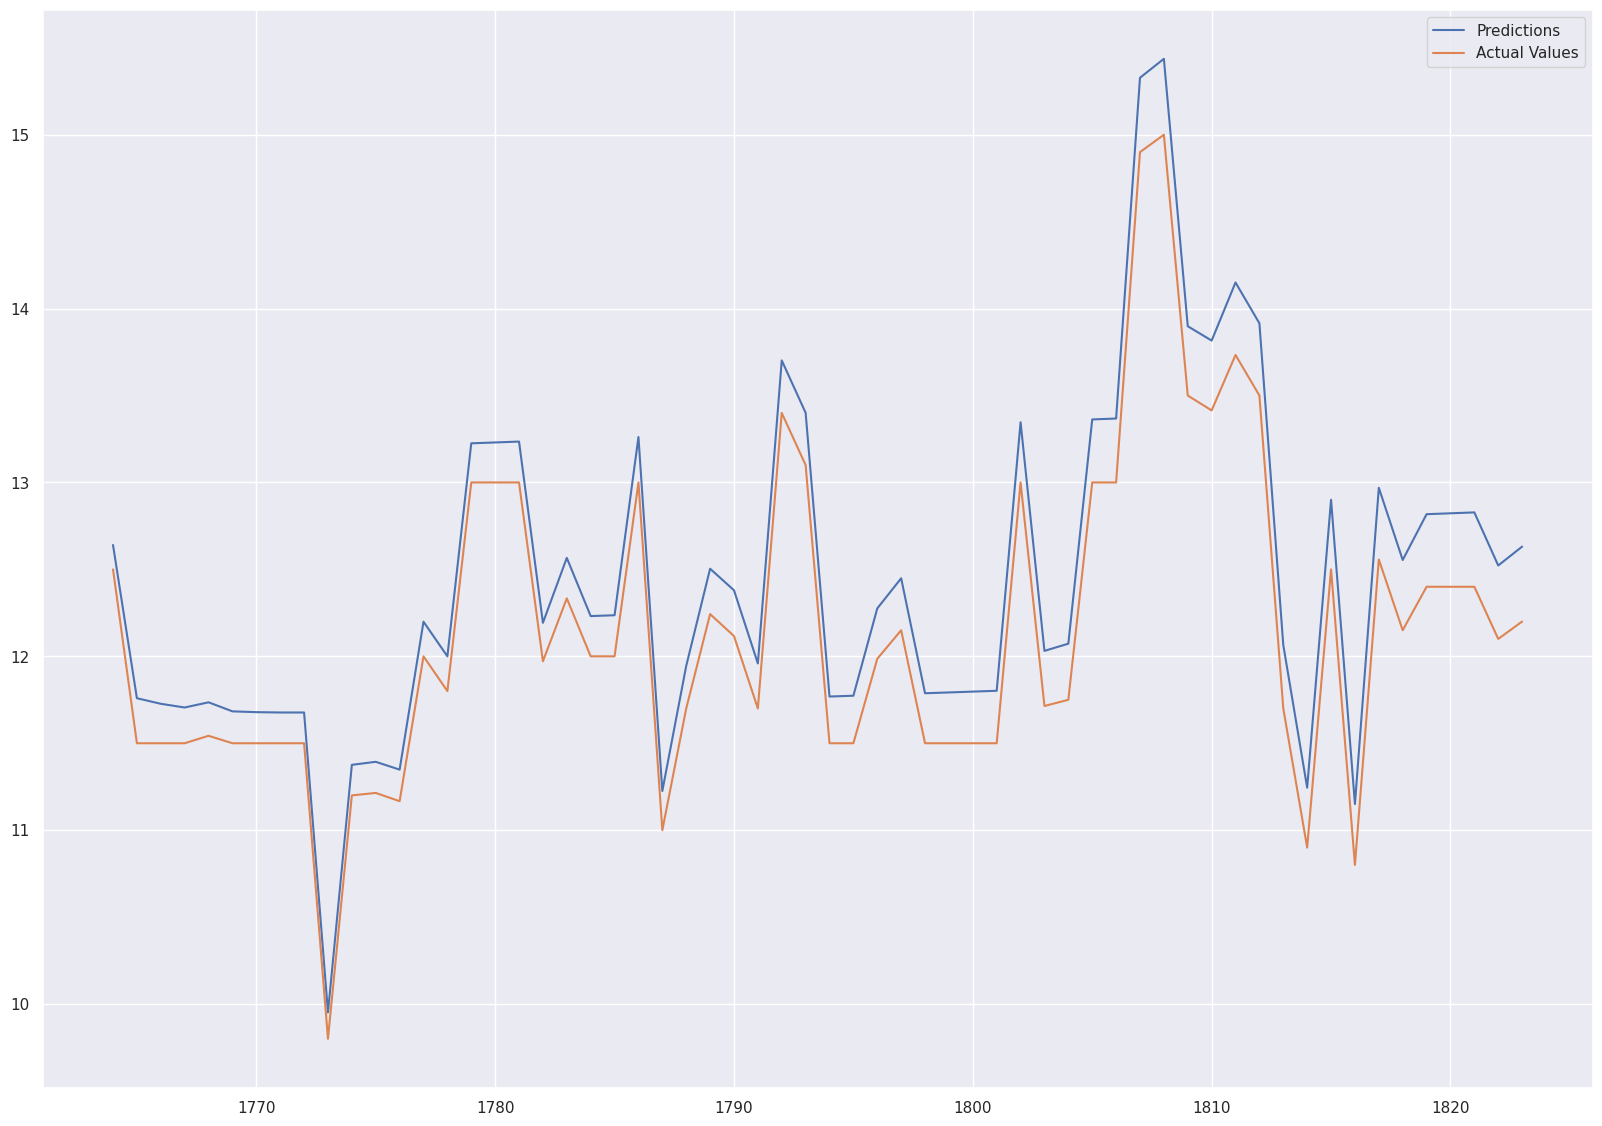

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predicted_price, label='Predictions')
plt.plot(filled_UPCOM_data['close_BWA'].tail(60), label='Actual Values')
plt.legend()
plt.show()

In [ ]:
y_test = filled_UPCOM_data['close_BWA'].tail(60)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
mae = mean_absolute_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)
rse = np.sqrt(np.mean((y_test - predicted_price)**2))
df_r = pd.DataFrame(columns = ["Stock","rmse", "mae", "r2", "rse"])
df_r.at[1,'Stock'] = 'BWA'
df_r.at[1,"rmse"] = rmse
df_r.at[1,"mae"] = mae
df_r.at[1,'r2'] = r2
df_r.at[1,'rse'] = rse

In [ ]:
df_r

,Stock,rmse,mae,r2,rse
1,BWA,0.304084,0.291291,0.892577,0.304084


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Get the residuals
residuals = pd.DataFrame(model_fit.resid)

# Plot the ACF and PACF of the residuals
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])
plt.show()

##DVC

In [ ]:
r_t_dvc =  np.log(filled_UPCOM_data['close_DVC']/filled_UPCOM_data['close_DVC'].shift(1)).values[1:]

Sử dụng auto ARIMA để chọn tham số

In [ ]:
from pmdarima.arima import auto_arima
modeldvc = auto_arima(r_t_dvc, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(modeldvc.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-23.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-21.961, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-306.427, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-568.027, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-975.265, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-491.006, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-973.623, Time=1.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1001.262, Time=1.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-981.002, Time=0.47 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1081.349, Time=1.01 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-1112.592, Time=2.56 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-1421.429, Time=1.54 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-674.065, Time=0.30 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-2157.997, Time=1.24 sec
 ARIMA(5,0,0)(0,0,0)[0]       

In [ ]:
r_t_dvc = pd.Series(r_t_dvc)

In [ ]:
from pmdarima.model_selection import train_test_split
from numpy import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
p, d, q = 4, 0, 5
train_size = int(len(r_t_dvc) * 0.7)

# Split the data into training and testing sets
train, test = r_t_dvc[0:1764], r_t_dvc.tail(60)

# Fit the ARIMA model to the training data
modeldvc = ARIMA(train, order=(p, d, q))
modeldvc_fit = modeldvc.fit()

# Use the model to make predictions on the testing set
predictions = modeldvc_fit.forecast(steps=len(test))
# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the model
#mse = mean_squared_error(test, predictions)
# Calculate the root mean squared error (RMSE) of the predictions
#rmse = sqrt(mean_squared_error(test, predictions))

#print('ARIMA model (p={}, d={}, q={}) RMSE: {}'.format(p, d, q, rmse))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
predictions

1764   -0.049921
1765    0.045511
1766    0.003436
1767   -0.113154
1768   -0.009780
1769    0.112303
1770    0.010991
1771   -0.050095
1772    0.042887
1773    0.007549
1774   -0.104014
1775   -0.011409
1776    0.103813
1777    0.009862
1778   -0.048925
1779    0.040271
1780    0.010977
1781   -0.095609
1782   -0.012762
1783    0.096032
1784    0.008978
1785   -0.047654
1786    0.037688
1787    0.013807
1788   -0.087875
1789   -0.013873
1790    0.088892
1791    0.008295
1792   -0.046300
1793    0.035160
1794    0.016116
1795   -0.080758
1796   -0.014771
1797    0.082330
1798    0.007779
1799   -0.044881
1800    0.032701
1801    0.017972
1802   -0.074206
1803   -0.015481
1804    0.076293
1805    0.007397
1806   -0.043413
1807    0.030325
1808    0.019433
1809   -0.068172
1810   -0.016026
1811    0.070731
1812    0.007125
1813   -0.041910
1814    0.028040
1815    0.020552
1816   -0.062613
1817   -0.016426
1818    0.065600
1819    0.006938
1820   -0.040384
1821    0.025854
1822    0.0213

In [ ]:
predicted_price = filled_UPCOM_data['close_DVC'].tail(60) * np.exp(predictions.cumsum())
predicted_price

1764    12.081569
1765    12.445003
1766    13.486869
1767    12.043949
1768    10.197669
1769    11.367320
1770    12.392399
1771    13.307785
1772    14.089375
1773    13.896217
1774    11.532381
1775     9.989091
1776    11.034767
1777    13.871952
1778    12.164235
1779    12.763035
1780    12.803876
1781    11.636414
1782    10.745158
1783    12.185784
1784    12.661225
1785    12.072022
1786    12.535677
1787    12.709962
1788    11.640737
1789    11.067120
1790    11.971271
1791    12.552499
1792    11.984572
1793    12.610478
1794    14.016800
1795    12.282864
1796    10.906794
1797    12.005082
1798    13.144408
1799    11.234599
1800    13.280400
1801    13.621387
1802    12.647192
1803    10.726248
1804    11.611906
1805    12.544367
1806    12.392745
1807    13.462155
1808    13.726322
1809    12.821757
1810    12.354770
1811    13.575661
1812    13.141747
1813    12.697831
1814    12.960731
1815    13.530540
1816    12.803468
1817    11.629095
1818    12.014924
1819    13

In [ ]:
y_test = filled_UPCOM_data['close_DVC'].tail(60)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
mae = mean_absolute_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)
rse = np.sqrt(np.mean((y_test - predicted_price)**2))
#df_r = pd.DataFrame(columns = ["Stock","rmse", "mae", "r2", "rse"])
df_r.at[2,'Stock'] = 'DVC'
df_r.at[2,"rmse"] = rmse
df_r.at[2,"mae"] = mae
df_r.at[2,'r2'] = r2
df_r.at[2,'rse'] = rse

In [ ]:
df_r

,Stock,rmse,mae,r2,rse
1,BWA,0.304084,0.291291,0.892577,0.304084
2,DVC,0.637219,0.452716,0.286158,0.637219


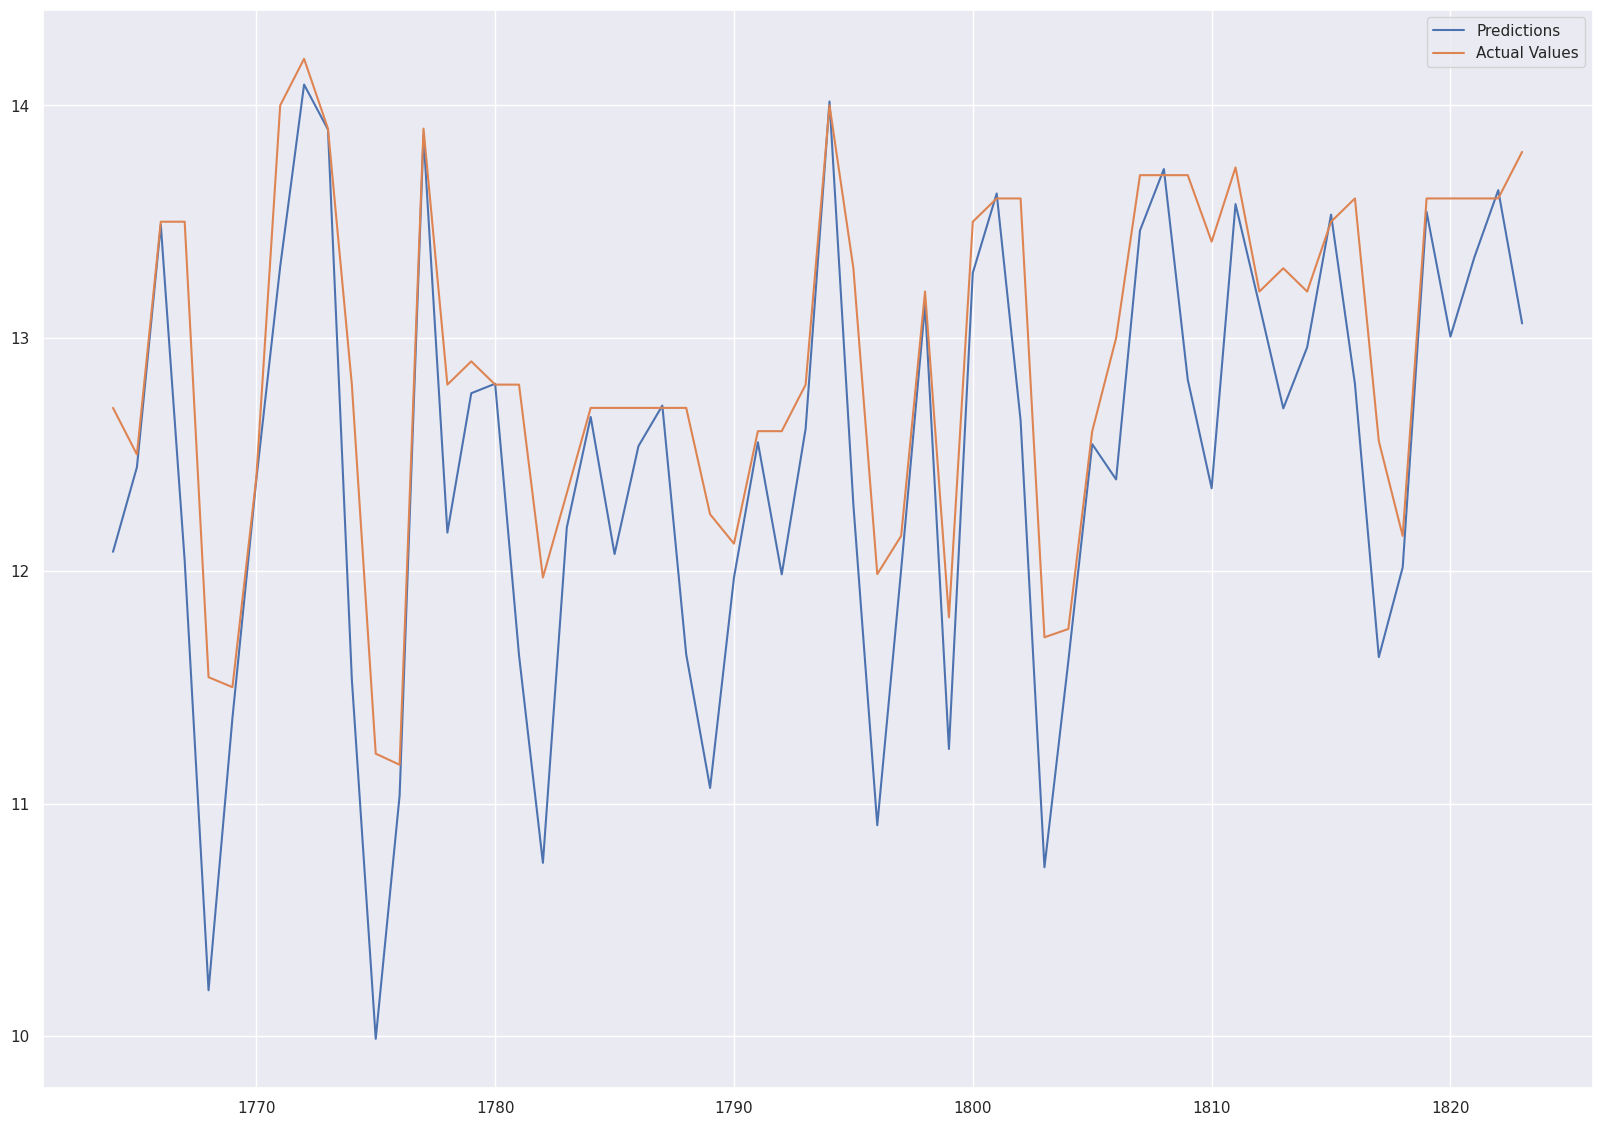

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predicted_price, label='Predictions')
plt.plot(filled_UPCOM_data['close_DVC'].tail(60), label='Actual Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Print the evaluation metrics
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('MAPE: ', mape)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Get the residuals
residuals = pd.DataFrame(model_fit.resid)

# Plot the ACF and PACF of the residuals
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])
plt.show()

##HFC

In [ ]:
r_t_hfc =  np.log(filled_UPCOM_data['close_HFC']/filled_UPCOM_data['close_HFC'].shift(1)).values[1:]

In [ ]:
from pmdarima.arima import auto_arima
modelhfc = auto_arima(r_t_hfc, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(modelhfc.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2028.280, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2029.545, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1740.370, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1479.104, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1099.772, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1577.904, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1101.397, Time=0.70 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1082.875, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1146.742, Time=0.55 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1054.533, Time=0.70 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=67.217, Time=2.43 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=731.706, Time=0.78 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-337.410, Time=2.26 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=0.110, Time=2.40 sec
 ARIMA(5,0,3)(0,0,0)[0]             : A

In [ ]:
r_t_hfc = pd.Series(r_t_hfc)

In [ ]:
from pmdarima.model_selection import train_test_split
from numpy import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
p, d, q = 4, 0, 5

# Split the data into training and testing sets
train, test = r_t_hfc[0:1764], r_t_hfc.tail(60)

# Fit the ARIMA model to the training data
modelhfc = ARIMA(train, order=(p, d, q))
modelhfc_fit = modelhfc.fit()

# Use the model to make predictions on the testing set
predictions = modelhfc_fit.forecast(steps=len(test))
# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the model
#mse = mean_squared_error(test, predictions)
# Calculate the root mean squared error (RMSE) of the predictions
#rmse = sqrt(mean_squared_error(test, predictions))

#print('ARIMA model (p={}, d={}, q={}) RMSE: {}'.format(p, d, q, rmse))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
predicted_price = filled_UPCOM_data['close_HFC'].tail(60) * np.exp(predictions.cumsum())
predicted_price

1764    11.471995
1765    12.251606
1766    11.375819
1767    10.115497
1768    10.313540
1769    11.557191
1770    12.058025
1771    11.353683
1772    12.220502
1773    12.499984
1774    10.141443
1775    10.057693
1776    11.235051
1777    11.140630
1778    11.615950
1779    13.098870
1780    11.352044
1781    11.539643
1782    10.774601
1783    12.421481
1784    12.932922
1785    12.162376
1786    12.970319
1787    12.372036
1788    11.106815
1789    11.055292
1790    12.214245
1791    11.317025
1792    12.050254
1793    13.848016
1794    14.214681
1795    12.418294
1796    10.856615
1797    12.257552
1798    13.507022
1799    12.692577
1800    13.021778
1801    13.275897
1802    11.890159
1803    10.641600
1804    11.862244
1805    12.994661
1806    12.208320
1807    13.000322
1808    12.853365
1809    11.543230
1810    12.219201
1811    13.872911
1812    13.382723
1813    12.571159
1814    13.180404
1815    13.767643
1816    12.396374
1817    11.467782
1818    12.279908
1819    13

In [ ]:
y_test = filled_UPCOM_data['close_HFC'].tail(60)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
mae = mean_absolute_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)
rse = np.sqrt(np.mean((y_test - predicted_price)**2))
#df_r = pd.DataFrame(columns = ["Stock","rmse", "mae", "r2", "rse"])
df_r.at[3,'Stock'] = 'HFC'
df_r.at[3,"rmse"] = rmse
df_r.at[3,"mae"] = mae
df_r.at[3,'r2'] = r2
df_r.at[3,'rse'] = rse

In [ ]:
df_r

,Stock,rmse,mae,r2,rse
1,BWA,0.304084,0.291291,0.892577,0.304084
2,DVC,0.637219,0.452716,0.286158,0.637219
3,HFC,0.661833,0.499109,0.336793,0.661833


##MTG

In [ ]:
r_t_mtg =  np.log(filled_UPCOM_data['close_MTG']/filled_UPCOM_data['close_MTG'].shift(1)).values[1:]

In [ ]:
from pmdarima.arima import auto_arima
modelmtg = auto_arima(r_t_mtg, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(modelmtg.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2400.948, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2402.433, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2012.134, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1768.155, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1350.165, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1952.972, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1352.041, Time=1.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1198.017, Time=2.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1395.250, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1281.349, Time=1.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1126.855, Time=1.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1252.238, Time=1.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=952.255, Time=2.37 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.77 sec
 ARIMA(3,0,4)(0,0,0)[0]             : A

In [ ]:
r_t_mtg = pd.Series(r_t_mtg)

In [ ]:
from pmdarima.model_selection import train_test_split
from numpy import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
p, d, q = 4, 0, 5


# Split the data into training and testing sets
train, test = r_t_mtg[0:1764], r_t_mtg.tail(60)

# Fit the ARIMA model to the training data
modelmtg = ARIMA(train, order=(p, d, q))
modelmtg_fit = modelmtg.fit()

# Use the model to make predictions on the testing set
predictions = modelmtg_fit.forecast(steps=len(test))
# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the model
#mse = mean_squared_error(test, predictions)
# Calculate the root mean squared error (RMSE) of the predictions
#rmse = sqrt(mean_squared_error(test, predictions))

#print('ARIMA model (p={}, d={}, q={}) RMSE: {}'.format(p, d, q, rmse))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
predicted_price = filled_UPCOM_data['close_MTG'].tail(60) * np.exp(predictions.cumsum())
predicted_price

1764     9.245625
1765     8.723128
1766     8.945347
1767    10.338741
1768    13.926944
1769    12.179258
1770     8.805465
1771     9.077334
1772     9.920234
1773    10.479610
1774    11.811837
1775    13.542927
1776    11.871744
1777    10.118634
1778    10.775421
1779    10.394657
1780    10.415748
1781    11.826333
1782    14.471962
1783    13.162817
1784     9.113886
1785     9.616607
1786     8.867546
1787     8.841598
1788     9.888501
1789    14.816491
1790    12.981886
1791     8.630228
1792     9.000153
1793     8.596704
1794     8.986526
1795    10.024429
1796    14.522682
1797    13.068492
1798     8.354918
1799     8.934830
1800     8.642301
1801     8.480156
1802     9.182049
1803    14.212052
1804    12.687891
1805     8.399076
1806     8.531230
1807     8.151378
1808     8.296921
1809     9.318704
1810    16.296826
1811    14.888031
1812     8.443071
1813     8.686847
1814     8.301524
1815     8.331243
1816     9.333600
1817    15.277629
1818    13.223737
1819     8

In [ ]:
y_test = filled_UPCOM_data['close_MTG'].tail(60)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
mae = mean_absolute_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)
rse = np.sqrt(np.mean((y_test - predicted_price)**2))
#df_r = pd.DataFrame(columns = ["Stock","rmse", "mae", "r2", "rse"])
df_r.at[4,'Stock'] = 'MTG'
df_r.at[4,"rmse"] = rmse
df_r.at[4,"mae"] = mae
df_r.at[4,'r2'] = r2
df_r.at[4,'rse'] = rse

In [ ]:
df_r

,Stock,rmse,mae,r2,rse
1,BWA,0.304084,0.291291,0.892577,0.304084
2,DVC,0.637219,0.452716,0.286158,0.637219
3,HFC,0.661833,0.499109,0.336793,0.661833
4,MTG,1.334203,1.127623,0.458345,1.334203


##QPH

In [ ]:
r_t_qph =  np.log(filled_UPCOM_data['close_QPH']/filled_UPCOM_data['close_QPH'].shift(1)).values[1:]

In [ ]:
from pmdarima.arima import auto_arima
modelqph = auto_arima(r_t_qph, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(modelqph.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3182.018, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3183.671, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2752.721, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2511.551, Time=0.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2080.525, Time=0.97 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2718.269, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2082.506, Time=1.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2065.011, Time=1.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2114.792, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1997.803, Time=1.12 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1963.276, Time=2.52 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1659.392, Time=0.95 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2551.937, Time=0.23 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=901.739, Time=1.09 sec
 ARIMA(5,0,0)(0,0,0)[0]           

In [ ]:
r_t_qph = pd.Series(r_t_qph)

In [ ]:
from pmdarima.model_selection import train_test_split
from numpy import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
p, d, q = 4, 0, 5


# Split the data into training and testing sets
train, test = r_t_qph[0:1764], r_t_qph.tail(60)

# Fit the ARIMA model to the training data
modelqph = ARIMA(train, order=(p, d, q))
modelqph_fit = modelqph.fit()

# Use the model to make predictions on the testing set
predictions = modelqph_fit.forecast(steps=len(test))
# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the model
#mse = mean_squared_error(test, predictions)
# Calculate the root mean squared error (RMSE) of the predictions
#rmse = sqrt(mean_squared_error(test, predictions))

#print('ARIMA model (p={}, d={}, q={}) RMSE: {}'.format(p, d, q, rmse))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
predicted_price = filled_UPCOM_data['close_QPH'].tail(60) * np.exp(predictions.cumsum())
predicted_price

1764    21.012530
1765    27.660645
1766    25.422863
1767    11.744441
1768     5.080323
1769    10.861295
1770    27.940017
1771    22.369266
1772    30.875242
1773    28.115796
1774    13.689518
1775     5.238387
1776    10.573967
1777    28.387889
1778    21.187846
1779    28.788089
1780    27.796496
1781    13.449035
1782     5.890352
1783    11.702277
1784    26.141748
1785    20.913423
1786    29.837057
1787    29.721049
1788    15.863440
1789     6.304374
1790    11.513603
1791    28.222980
1792    21.790594
1793    30.189135
1794    31.314897
1795    17.030809
1796     6.423703
1797    11.556482
1798    28.797353
1799    22.135617
1800    28.324960
1801    29.881458
1802    17.071804
1803     6.503431
1804    11.181840
1805    24.183295
1806    18.472175
1807    26.132403
1808    27.935294
1809    16.454188
1810     7.683097
1811    13.070862
1812    24.615390
1813    18.552718
1814    26.275509
1815    27.894508
1816    17.182268
1817     7.394165
1818    11.561277
1819    25

In [ ]:
y_test = filled_UPCOM_data['close_QPH'].tail(60)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
mae = mean_absolute_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)
rse = np.sqrt(np.mean((y_test - predicted_price)**2))
#df_r = pd.DataFrame(columns = ["Stock","rmse", "mae", "r2", "rse"])
df_r.at[5,'Stock'] = 'QPH'
df_r.at[5,"rmse"] = rmse
df_r.at[5,"mae"] = mae
df_r.at[5,'r2'] = r2
df_r.at[5,'rse'] = rse

In [ ]:
df_r

,Stock,rmse,mae,r2,rse
1,BWA,0.304084,0.291291,0.892577,0.304084
2,DVC,0.637219,0.452716,0.286158,0.637219
3,HFC,0.661833,0.499109,0.336793,0.661833
4,MTG,1.334203,1.127623,0.458345,1.334203
5,QPH,6.994451,5.137097,0.213902,6.994451


In [ ]:
predictedp = pd.DataFrame(data=predicted_price)
predictedp.set_index(filled_UPCOM_data['date'].tail(60))

,0
date,
2021-11-02,21.012530
2021-11-03,27.660645
2021-11-04,25.422863
2021-11-05,11.744441
2021-11-06,5.080323
2021-11-07,10.861295
2021-11-08,27.940017
2021-11-09,22.369266
2021-11-10,30.875242


In [ ]:
ori = pd.DataFrame(data=filled_UPCOM_data['close_QPH'].tail(60))
ori.set_index(filled_UPCOM_data['date'].tail(60))

,close_QPH
date,
2021-11-02,26.900000
2021-11-03,26.900000
2021-11-04,26.900000
2021-11-05,26.900000
2021-11-06,11.542857
2021-11-07,11.500000
2021-11-08,28.000000
2021-11-09,30.000000
2021-11-10,31.000000


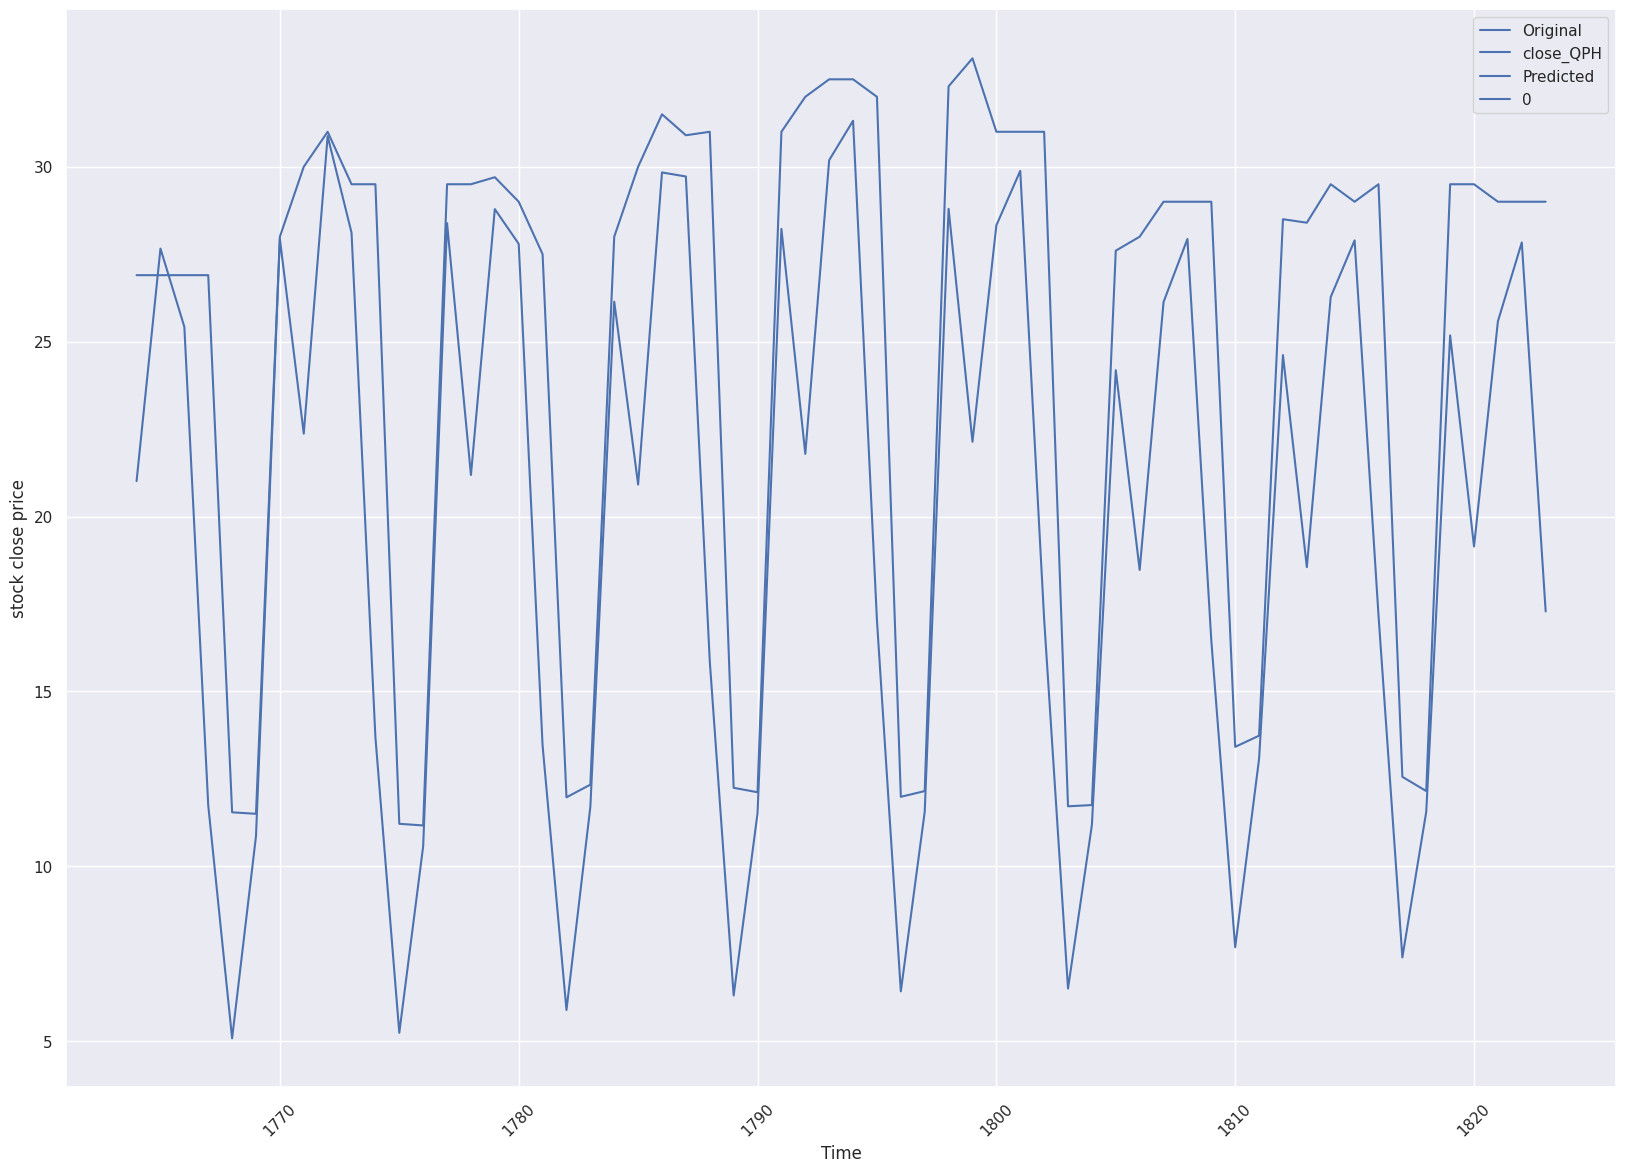

In [ ]:

# Plot the original and predicted series
sns.lineplot(data=ori, label='Original')
sns.lineplot(data=predictedp, label='Predicted')

plt.xticks(rotation=45)
# Add axis labels and legend
plt.xlabel('Time')
plt.ylabel('stock close price')
plt.legend()
plt.show()

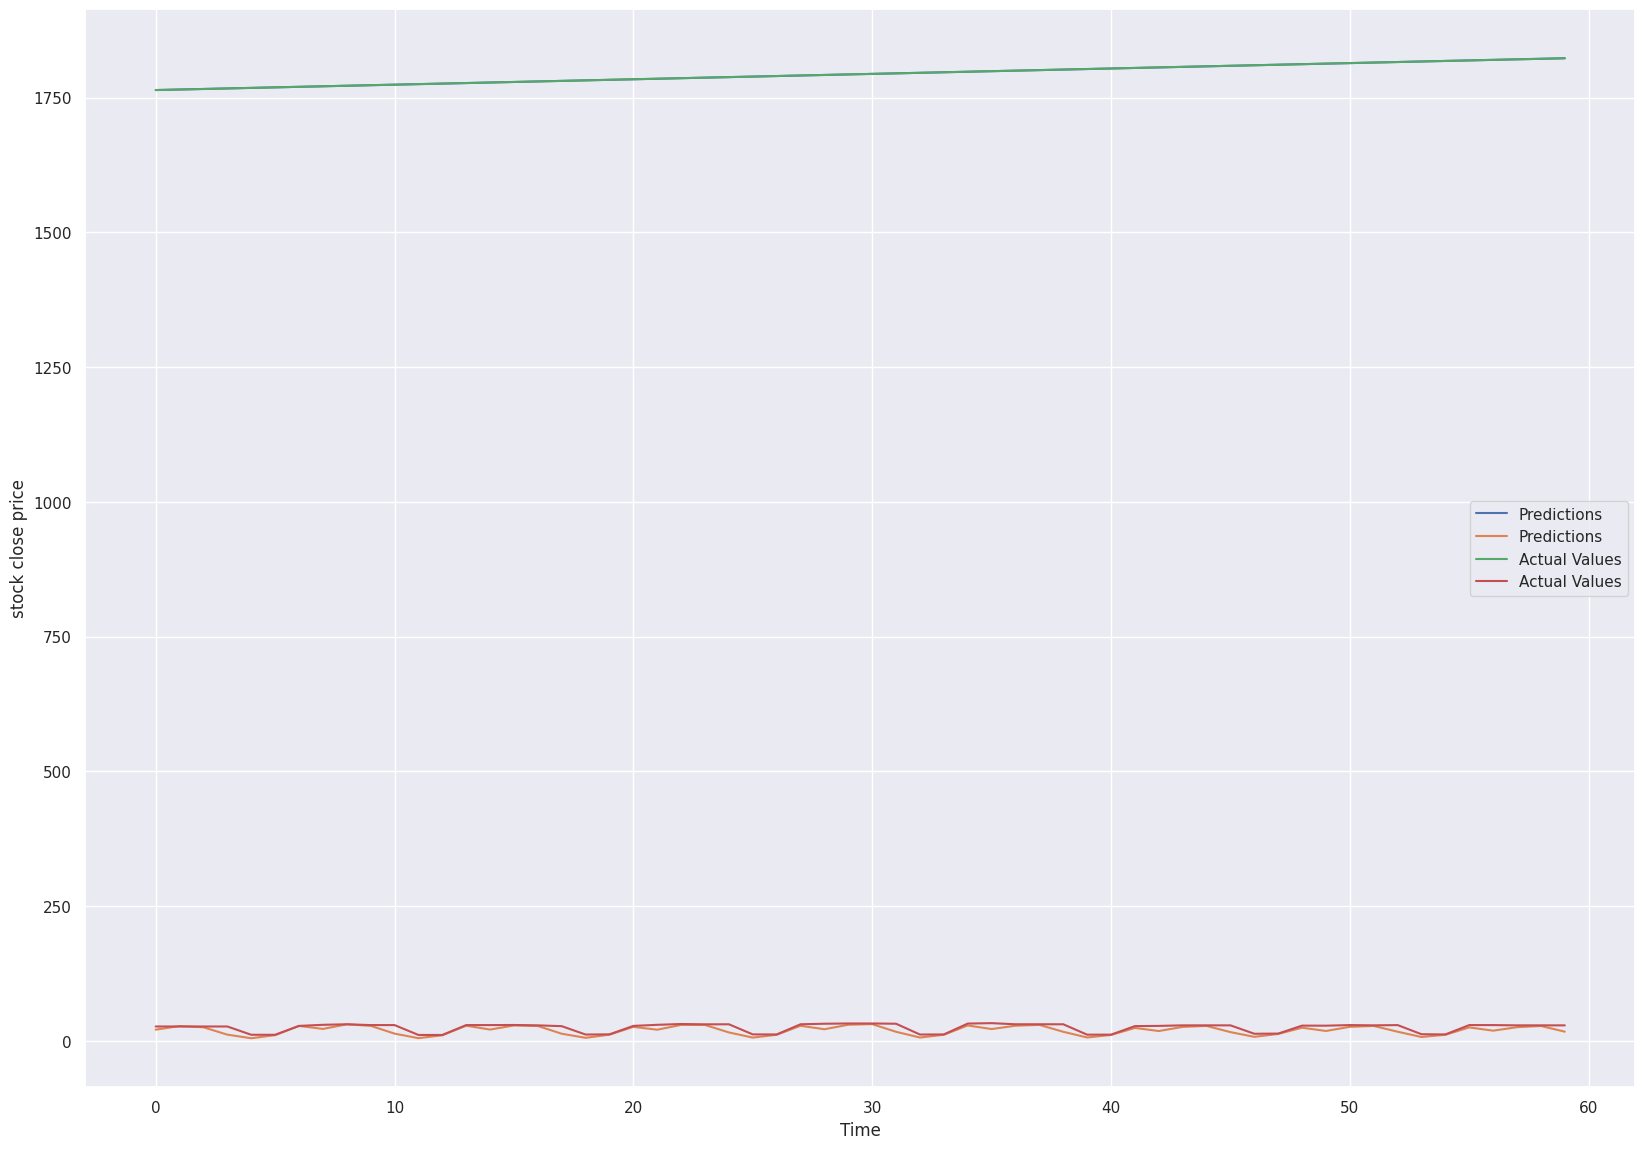

In [ ]:
plt.plot(predictedp, label='Predictions')
plt.plot(ori, label='Actual Values')
plt.xlabel('Time')
plt.ylabel('stock close price')
plt.legend()
plt.show()